<a href="https://www.kaggle.com/code/aggarwalbhavya/credit-card-customer-churn-and-clustering?scriptVersionId=265712912" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Overview

- ### Background
    This data set contains **credit card customer data** from a fictional bank. It stimulates real-world behavior with features related to demographics, credit usage and account activity.
    
    Here, we are trying to explore the data and create data visualisations to draw out meaningful insights and to predict whether a customer will churn or not based on their profile and activity.

- ### Key Features
  | Feature Name               | Data Type | Category    | Description                                           |
| -------------------------- | --------- | ----------- | ----------------------------------------------------- |
| `CLIENTNUM`                | int64     | Identifier  | Unique customer ID (not used for modeling)            |
| `Attrition_Flag`           | object    | Target      | Churn status: 🟢 Existing or 🔴 Attrited              |
| `Customer_Age`             | int64     | Numerical   | Age of the customer                                   |
| `Gender`                   | object    | Categorical | Customer gender                                       |
| `Dependent_count`          | int64     | Numerical   | Number of dependents                                  |
| `Education_Level`          | object    | Categorical | Education level (High School, Graduate, etc.)         |
| `Marital_Status`           | object    | Categorical | Marital status (Married, Single, etc.)                |
| `Income_Category`          | object    | Categorical | Income bracket (Less than \$40K, \$40K - \$60K, etc.) |
| `Card_Category`            | object    | Categorical | Credit card type (Blue, Silver, Gold, Platinum)       |
| `Months_on_book`           | int64     | Numerical   | Tenure with the bank (in months)                      |
| `Total_Relationship_Count` | int64     | Numerical   | Total number of bank products held                    |
| `Months_Inactive_12_mon`   | int64     | Numerical   | Inactive months in the past 12 months                 |
| `Contacts_Count_12_mon`    | int64     | Numerical   | Customer service contacts in the past 12 months       |
| `Credit_Limit`             | float64   | Numerical   | Credit card limit                                     |
| `Total_Revolving_Bal`      | int64     | Numerical   | Revolving balance on the card                         |
| `Avg_Open_To_Buy`          | float64   | Numerical   | Average available credit                              |
| `Total_Trans_Amt`          | int64     | Numerical   | Total transaction amount in last 12 months            |
| `Total_Trans_Ct`           | int64     | Numerical   | Total transaction count in last 12 months             |
| `Total_Ct_Chng_Q4_Q1`      | float64   | Numerical   | Change in transaction count Q4 vs Q1                  |
| `Total_Amt_Chng_Q4_Q1`     | float64   | Numerical   | Change in transaction amount Q4 vs Q1                 |
| `Avg_Utilization_Ratio`    | float64   | Numerical   | Average card utilization rate                         |


- ### Input

  * `BankChurners.csv`: Main dataset including both input features and target variable.

- ### Project Objective
    
    The goal of this notebook is to **analyze customer behavior and predict churn**, supporting business decisions like:
    
    * Targeted retention strategies
    * Personalized offers for at-risk customers
    * Reducing customer attrition

- ### Key Steps

    * **Exploratory Data Analysis (EDA):** <br>
      Understand patterns in customer behavior and churn.
    
    * **Feature Engineering:**
      Encode categorical variables, scale numerical features, and create meaningful derived variables (e.g. utilization ratios, transaction trends).
    
    * **Modeling:**
      Apply various classifiers like:
    
      * Logistic Regression
      * Random Forest
      * XGBoost
      * LightGBM
      * MLPClassifier
  

- ### Evaluation Framework

  * Use **Stratified Cross-Validation**
  * Assess using:

    * Accuracy
    * Precision
    * Recall
    * F1-score
    * ROC-AUC

# Import Libraries

In [2]:
# Core data manipulation libraries
import pandas as pd
import numpy as np

# Visulaization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import shap

import plotly.express as ex
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.offline as pyo
pyo.init_notebook_mode()
sns.set_style('darkgrid')

# Statistical functions
from scipy.stats import skew

# Display utilities for Jupyter notebook
from IPython.display import display

# Machine Learning pre-processing and modeling
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder, RobustScaler, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import optuna 
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Metrics
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix, precision_recall_curve, auc, f1_score as f1

# Statistical
from scipy.stats import chi2_contingency
from scipy.stats import shapiro, probplot
from scipy.stats import mannwhitneyu
from scipy.stats import levene
from scipy.stats import ttest_ind
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import kruskal
from scipy.stats import anderson
from scipy.stats import normaltest
!pip install scikit-posthocs
import scikit_posthocs as sp

# Suppress warnings for clearer output
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", 500)
pd.set_option("max_colwidth", None)

# Load Data

In [3]:
# Loading the Data set
df_customer_churn = pd.read_csv("/kaggle/input/credit-card-customers/BankChurners.csv")

# Verify shapes
print("Data Shape: ", df_customer_churn.shape)

Data Shape:  (10127, 23)


# Data Preview and Information

In [4]:
# Displaying a few rows of the data set
print('Data Preview: ')
display(df_customer_churn.head())

Data Preview: 


CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3       12691.0                  777          11914.0   
1                      2        8256.0                  864           7392.0   
2                      0        3418.0                    0           3418.0   
3                      1        3313.0                 2517            796.0   
4                      0        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                                                                                                            0.000093   
1                                                                                                                            0.000057   
2                                                                                                                            0.000021   
3                                                                                                                            0.000134   
4                                                                                                                            0.000022   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                                                                                                             0.99991  
1                                                                                                                             0.99994  
2                                                                                                                             0.99998  
3                                                                                                                             0.99987  
4                                                                                                   

# Insights from Initial Data Exploration

- **Data set size and structure:**
  The data set contains **10127** samples with **23** columns, including the target variable `Attrition_Flag`.

- **Feature Overview:**
  - **Numerical Features:** `Customer_Age`, `Dependent_count`, `Months_on_book`, `Total_Relationship_Count`, `Months_Inactive_12_mon`, `Contacts_Count_12_mon`, `Credit_Limit`, `Total_Revolving_Bal`, `Avg_Open_To_Buy`, `Total_Trans_Amt`, `Total_Trans_Ct`, `Total_Ct_Chng_Q4_Q1`, `Total_Amt_Chng_Q4_Q1` and `Avg_Utilization_Ratio`.
     - **Categorical features:** `Attrition_Flag`, `Gender`, `Education_Level`, `Marital_Status`, `Income_Category`, `Card_Category`.
   - The target variable is **object** value.

- **Data Completeness:**
   - The dataset have **no missing values**, we need to handle this issue.
   - Data types are appropriate: numerical features is float64 and int64, and categorical features are objects (strings).
   - The columns `Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1`, `Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2` are not meaningful for analysis. So these columns are not really a part of the information we should care about. We can drop them.

In [5]:
# Dropping data columns 
df_customer_churn.drop(columns="Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1", axis=1, inplace=True)
df_customer_churn.drop(columns="Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2", axis=1, inplace=True)

In [6]:
df_customer_churn.columns = (
    df_customer_churn.columns
    .str.strip()
)

In [7]:
cat_features = ["Attrition_Flag", "Gender", "Education_Level", "Marital_Status", "Income_Category", "Card_Category", "Dependent_count",
                "Months_Inactive_12_mon", "Contacts_Count_12_mon", "Total_Relationship_Count"]

num_features = ["Customer_Age", "Credit_Limit", "Avg_Open_To_Buy", "Total_Trans_Amt", "Months_on_book", 
                "Total_Trans_Ct", "Total_Ct_Chng_Q4_Q1", "Total_Amt_Chng_Q4_Q1", "Avg_Utilization_Ratio", "Total_Revolving_Bal"]

def convert_cat (df, cat_features=cat_features):
    for feature in cat_features:
        if feature in df.columns:
            df[feature] = df[feature].astype('category')
        else:
            pass

convert_cat(df_customer_churn)

In [8]:
df_customer_churn[num_features] = df_customer_churn[num_features].astype({
    "Customer_Age": "int8",
    "Credit_Limit": "float32",
    "Avg_Open_To_Buy": "float32",
    "Total_Trans_Amt": "int32",
    "Months_on_book": "int8",
    "Total_Trans_Ct": "int16",
    "Total_Ct_Chng_Q4_Q1": "float32",
    "Total_Amt_Chng_Q4_Q1": "float32",
    "Avg_Utilization_Ratio": "float32",
    "Total_Revolving_Bal": "int16"
})

In [9]:
# Information on the data frame
print('Data Information: ')
display(df_customer_churn.info())

Data Information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CLIENTNUM                 10127 non-null  int64   
 1   Attrition_Flag            10127 non-null  category
 2   Customer_Age              10127 non-null  int8    
 3   Gender                    10127 non-null  category
 4   Dependent_count           10127 non-null  category
 5   Education_Level           10127 non-null  category
 6   Marital_Status            10127 non-null  category
 7   Income_Category           10127 non-null  category
 8   Card_Category             10127 non-null  category
 9   Months_on_book            10127 non-null  int8    
 10  Total_Relationship_Count  10127 non-null  category
 11  Months_Inactive_12_mon    10127 non-null  category
 12  Contacts_Count_12_mon     10127 non-null  category
 13  Credit_Limit              1

None

In [10]:
# Data Description
print('Data Description: ')
cm = sns.light_palette('green', as_cmap=True)
display(df_customer_churn.drop(columns='CLIENTNUM', axis=1).describe().T.style.background_gradient(cmap=cm))

Data Description: 


## Descriptive Insights – Numerical Features

**1. Demographics & Tenure**

* **Customer Age**

  * Mean: **46.3 years** | Range: 26–73
  * 25–75%: **41–52** → Primarily middle-aged adults
  * Std: 8.0 → Fairly even distribution

* **Months on Book** (Tenure)

  * Mean: **35.9 months** (\~3 years)
  * 25–75%: **31–40** → Most customers have stayed for 2.5–3.5 years
  * Std: 8.0 → Moderate spread

**2. Credit Behavior**

* **Credit Limit**

  * Mean: **\$8,632** | Max: \$34,516
  * 25–75%: **\$4,549–\$11,068**
  * Std: **\$9,089** → Highly dispersed, potential right-skewness

* **Avg Open to Buy**

  * Mean: **\$7,469** (closely follows `Credit_Limit`)
  * Std: **\$9,091** → Strong dependency between the two

* **Avg Utilization Ratio**

  * Mean: **27.5%**
  * 25–75%: **2.3%–50.3%** | Max: \~**99.9%**
  * → Some customers nearly max out their limits → Potential risk or loyal high spenders

* **Total Revolving Balance**

  * Mean: **\$1,162**
  * 25–75%: **\$359–\$1,784**
  * Std: **\$815** → Wide variability, warrants skewness check

**3. Transaction Behavior**

* **Total Transaction Amount**

  * Mean: **\$4,404** | Max: \$18,484
  * 25–75%: **\$2,156–\$4,741**
  * Std: **\$3,397** → Outliers likely among high spenders

* **Total Transaction Count**

  * Mean: **\~65 transactions/year**
  * 25–75%: **45–81 transactions**
  * Std: 23.5 → Ranges from light to highly active users

**4. Behavioral Changes**

* **Total Amt Change Q4/Q1**

  * Mean: **0.76** | Max: **3.40**
  * 25–75%: **0.63–0.86**
  * → Some customers drastically increased spending in Q4 → May signal churn or upsell opportunity

* **Total Ct Change Q4/Q1**

  * Mean: **0.71**
  * Std: 0.24 → Frequency shifts may indicate behavioral trends

**Summary**

* **Credit and transaction features show high variance** → Consider scaling or transformation
* **Age and tenure are more normally distributed** → Easier to model
* Features like `Total_Amt_Chng_Q4_Q1`, `Avg_Utilization_Ratio`, and `Total_Revolving_Bal` exhibit **strong financial behavior patterns** → Valuable churn predictors.

In [11]:
# Data Description
print('Data Describe: ')
display(df_customer_churn.describe(include=['category', 'object']).T)

Data Describe: 


count unique                top  freq
Attrition_Flag            10127      2  Existing Customer  8500
Gender                    10127      2                  F  5358
Dependent_count           10127      6                  3  2732
Education_Level           10127      7           Graduate  3128
Marital_Status            10127      4            Married  4687
Income_Category           10127      6     Less than $40K  3561
Card_Category             10127      4               Blue  9436
Total_Relationship_Count  10127      6                  3  2305
Months_Inactive_12_mon    10127      7                  3  3846
Contacts_Count_12_mon     10127      7                  3  3380

## Descriptive Insights - Categorical Features

`Attrition_Flag` *(Target Variable)*

* Two classes:
  `Existing Customer` – 85.0%
  `Attrited Customer` – 15.0%
* **Observation:** Highly imbalanced → Resampling or class weighting needed

`Gender`

* Two values: `F`, `M`
* Majority: Female (≈ 52.9%)
* **Insight:** Balanced distribution → Can be used in segmentation or churn analysis

`Dependent_count`

* 6 unique values (0–5)
* Most frequent: 3 dependents (2,732 customers)
* **Insight:** Represents family responsibility → Consider ordinal treatment

`Education_Level`

* 7 levels, top category: `Graduate` (3,128)
* **Insight:** Relevant for income segmentation and credit behavior analysis

`Marital_Status`

* 4 values, most common: `Married` (4,687)
* **Insight:** May impact spending behavior → Check churn across groups

`Income_Category`

* 6 income brackets
* Most frequent: `Less than $40K` (3,561)
* **Insight:** Skewed toward lower-income segment → May affect product usage

`Card_Category`

* 4 categories, heavily skewed toward `Blue` (≈ 93%)
* **Insight:** Highly imbalanced → Consider grouping or frequency encoding

`Total_Relationship_Count`

* 6 values, most common: 3 (2,305 customers)
* **Insight:** Reflects product engagement → Key indicator of customer loyalty

`Months_Inactive_12_mon`

* 7 values, peak at 3 months (3,846 customers)
* **Insight:** Strong behavioral feature → Linked to potential churn risk

`Contacts_Count_12_mon`

* 7 levels, most common: 3 contacts/year (3,380)
* **Insight:** Indicates engagement with bank → Analyze correlation with churn

**Summary of Key Observations**

| Key Finding                                        | Suggested Next Step                             |
| -------------------------------------------------- | ----------------------------------------------- |
| Target is imbalanced (85% vs. 15%)                 | Apply resampling or class weights               |
| Card type is skewed toward `Blue`                  | Group rare categories or use frequency encoding |
| Behavioral features show clear usage patterns      | Leverage for churn prediction                   |
| Some features are ordinal (`Income`, `Dependents`) | Consider ordinal encoding or binning            |

# Data Quality Checks

## Missing Value

In [12]:
def displayNULL (df, dataset_name = None, style = 1):
    if style == 1 and dataset_name is None:
        for column in df.columns:
            if df[column].isna().sum() > 0:
                print(f"Column: {column}: {df[column].isnull().sum()}")
            else:
                pass

    else:
        missing_count = df.isnull().sum().sum()
        rows = len(df)

        print('=' * 40)
        print(f"{dataset_name} Missing Value Analysis")
        print('=' * 40)

        if missing_count == 0:
            print(f"No missing values detected in {rows: ,} rows")
        else:
            print(f"{missing_count} missing values found in {rows: ,} rows")

displayNULL(df = df_customer_churn, dataset_name = "Customer churn data", style = 2)

Customer churn data Missing Value Analysis
No missing values detected in  10,127 rows


## Checking duplicate value

In [13]:
def check_duplicates_report (df, dataset_name):
    duplicate_count = df.duplicated().sum()
    total_rows = len(df)

    print('=' * 40)
    print(f"{dataset_name} Duplicate Value Analysis")
    print('=' * 40)

    if duplicate_count == 0:
        print(f"No duplicate values found in {total_rows:,} rows")
    else:
        print(f"{duplicate_count} duplicates found in ({duplicate_count/total_rows}: .2%)")
        print(f"Total rows affected: {duplicate_count:,}/{total_rows:,}")

duplicate_summary = {}
check_duplicates_report(df = df_customer_churn, dataset_name = 'Customer churn data')
duplicate_summary['Data'] = {
    "duplicates": df_customer_churn.duplicated().sum(),
    "total_rows": len(df_customer_churn)
}

Customer churn data Duplicate Value Analysis
No duplicate values found in 10,127 rows


## Checking Outlier Value

In [14]:
def checking_outliers (list_feature, df, dataset_name):
    print('=' * 40)
    print(f"{dataset_name} Checking Outlier")
    print('=' * 40)

    outlier_info = []

    for feature in list_feature:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]

        if len(outliers) == 0:
            pass
        else:
            outlier_info.append({
                "Feature": feature,
                "Outlier Count": len(outliers),
                "Outlier Details": outliers.tolist()
            })

    return pd.DataFrame(outlier_info)

checking_outliers(list_feature = num_features, df = df_customer_churn, dataset_name = "Customer churn data")

Customer churn data Checking Outlier


Feature  Outlier Count  \
0          Customer_Age              2   
1          Credit_Limit            984   
2       Avg_Open_To_Buy            963   
3       Total_Trans_Amt            896   
4        Months_on_book            386   
5        Total_Trans_Ct              2   
6   Total_Ct_Chng_Q4_Q1            394   
7  Total_Amt_Chng_Q4_Q1            395   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        Outlier Details  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

## Data Quality Insights: Missing Values, Duplicates, and Outliers

**Missing Value Analysis**
- A thorough check for missing values across the dataset was conducted.
- **No missing values** in the dataset.

**Duplicate Record Analysis**
- The dataset was examined for duplicate rows that could bias the model and possibly inflate performance metrics.
- **No duplicate records** were found in any dataset, confirming the uniqueness and integrity of each sample.
- The absence of duplicates ensures that the model will not be trained or evaluated on repeated data points, which helps maintain the reliability of results.


**Outliers Record Analysis**
- The dataset was examined for outliers.
- On certain features of the dataset, outliers were found which can not be removed as they reflect reality.

# Exploratory Data Analysis

## Statistical Analysis Functions

In [15]:
def color (n_colors = 2):
    cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap = True)
    positions = np.linspace(0, 1, n_colors)
    colors = [cmap(p) for p in positions]
    return colors

In [16]:
# Chi-Square test of Independence

# Checking whether two categorical variables are independent or associated using a chi-square 
# test. It provides test statistics, p-values, and optionally - expected frequencies and
# standardized residuals (with heatmaps).

# Notes
# -----
#     - Hypotheses:
#         H₀ (Null):     The two variables are independent (no association).
#         H₁ (Alt.):      There is a dependency or association between the variables.
    
#     - Interpretation:
#         If p-value < 0.05 → Reject H₀ → Conclude that the variables are significantly associated.
#         If p-value ≥ 0.05 → Fail to reject H₀ → No statistically significant association found.


def cal_ChiSquare (cat_feature, target_feature, df, show_expected = False, show_residuals = True):
    print(f"\nChi-Square Test of Independence: {cat_feature} vs {target_feature}")

    crosstab = pd.crosstab(df[cat_feature], df[target_feature])
    chi2, p, dof, expected = chi2_contingency(crosstab)

    print(f"Chi-Squared statistic: {chi2:.3f}")
    print(f"Degrees of freedon: {dof}")
    print(f"p-value: {p:.6f}")

    if p < 0.05:
        print("Result: p-value < 0.05 → Reject H₀")
        print(f"→ There is a **statistically significant association** between '{cat_feature}' and '{target_feature}'.")
    else:
        print("Result: p-value ≥ 0.05 → Fail to reject H₀")
        print(f"→ No statistically significant association between '{cat_feature}' and '{target_feature}'.")

     # Optional: show expected frequencies
    if show_expected:
        print("\nExpected Frequencies:")
        print(pd.DataFrame(expected, index=crosstab.index, columns=crosstab.columns))
    else:
        pass

    # Optional: show standardized residuals
    if show_residuals:
        cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
        residuals = (crosstab - expected) / np.sqrt(expected)
        print("\nStandardized Residuals:")
        print(round(residuals, 2))

        # Heatmap of residuals
        plt.figure(figsize=(6, 4))
        sns.heatmap(residuals, annot=True, cmap=cmap, center=0, fmt=".2f", linewidths=0.5)
        plt.title(f"Standardized Residuals Heatmap: {cat_feature} vs {target_feature}")
        plt.ylabel(cat_feature)
        plt.xlabel(target_feature)
        plt.tight_layout()
        plt.show()
    else:
        pass


In [17]:
# Shapiro-Wilk test

# To assess normality of a numerical feature within each group defined by a categorical feature.

# This function iterates through all unique, non-null values of a categorical variable,
# and applies the Shapiro–Wilk test to the corresponding subgroup of the numeric variable.
# Optionally, it displays a Q-Q plot to visually assess the distribution.

# Notes
# -----
#     - H₀ (null hypothesis): The data is normally distributed.
#     - H₁ (alternative): The data is not normally distributed.
#     - If p > 0.05 → fail to reject H₀ → data appears normal.
#     - If p ≤ 0.05 → reject H₀ → data likely not normal.
#     - The test is not reliable for n > 5000 (as per scipy recommendation).
#     - Requires at least 3 non-null values per group.

def cal_shapiro (cat_feature, num_feature, df, plot_result = True):
    print(f"Shapiro-Wilk Normality Test for {num_feature} across {cat_feature} groups")

    for group in df[cat_feature].dropna().unique():
        data = df[df[cat_feature] == group][num_feature].dropna()
        n = len(data)

        if n < 3:
            print(f"Group {group} has too few values ({n}) to perform Shapiro-Wilk test.")
        elif n > 5000:
            print(f"Group {group} has {n} samples. Shapiro-Wilk may not be reliable for n > 5000.")
        else:
            stat, p = shapiro(data)
            print(f"Group: {group}")
            print(f"Shapiro-Wilk statistic: {stat:.3f}")
            print(f"p-value: {p}")

            if p > 0.05:
                print(f"Group '{group}' appears to follow a normal distribution.\n")
            else:
                print(f"Group '{group}' does not appear to follow a normal distribution.\n")

            if plot_result:
                probplot(data, dist="norm", plot=plt)
                plt.title(f"QQ Plot - {group}")
                plt.show()
            else:
                pass

In [18]:
# Levene's test

# To assess the equality (homogeneity) of variances for a numeric feature across two or more groups defined by a categorical feature.

# Levene's test is used to verify the assumption of equal variances (homoscedasticity), which is important for parametric tests such as the 
# independent t-test and ANOVA

# Notes
# -----
#     - H₀ (Null Hypothesis): All groups have equal variances.
#     - H₁ (Alternative Hypothesis): At least one group has different variance.
#     - If p > 0.05 → Fail to reject H₀ → Variances are approximately equal.
#     - If p ≤ 0.05 → Reject H₀ → Variances are significantly different.

def cal_levene(df, cat_feature, num_feature, center = 'mean'):
    print(f"Levene's test: {num_feature} ~ {cat_feature}")
    groups = df[cat_feature].unique()
    data_groups = [df[df[cat_feature] == g][num_feature] for g in groups]
    stat, p = levene(*data_groups, center = center)

    print(f"Levene statistis: {stat:.3f}")
    print(f"p-value", {p})

    if p > 0.05:
        print("Variances are approximately equal across groups.")
    else:
        print("Variances are significantly different across groups.")

In [40]:
# Mann–Whitney U test 

# To assess whether there is a statistically significant difference in the distribution 
# of a numerical feature between two independent groups defined by a binary categorical 
# feature.

# The function also compares medians, calculates the effect size (r), provides interpretation.
# Notes
# -----
#     - H₀ (Null Hypothesis): The two groups have the same distribution.
#     - H₁ (Alternative Hypothesis): The distributions are different.
#     - If p ≤ 0.05 → reject H₀ → significant difference.
#     - Effect size r helps interpret how strong the difference is:
#         * Small ~0.1, Medium ~0.3, Large ≥0.5

def cal_mannwhitneyu(df, cat_feature, num_feature):
    groups = df[cat_feature].dropna().unique()

    if len(groups) != 2:
        print(f"Error: Mann WhitneyU test requires exactly 2 groups, but found {len(groups)}.")
        return

    print(f"Mann–Whitney U Test for '{num_feature}' by '{cat_feature}'\n")
    print("H₀: The distributions of the two groups are equal.")
    print("H₁: The distributions are different.\n")

    group1 = df[df[cat_feature] == groups[0]][num_feature].dropna()
    group2 = df[df[cat_feature] == groups[1]][num_feature].dropna()

    stat, p = mannwhitneyu(group1, group2, alternative = 'two-sided')

    print(f"U statistic : {stat}")
    print(f"p-value     : {p}")

    # Interpretation
    if p <= 0.05:
        print("\nResult: Statistically significant difference between the two groups (Reject H₀).")
        median1 = group1.median()
        median2 = group2.median()
        if median1 > median2:
            print(f" Interpretation: Group '{groups[0]}' has a higher median '{num_feature}' than Group '{groups[1]}'.")
        elif median1 < median2:
            print(f" Interpretation: Group '{groups[1]}' has a higher median '{num_feature}' than Group '{groups[0]}'.")
        else:
            print(" Interpretation: The medians are equal, but distributions may still differ.")
    else:
        print("\nResult: No statistically significant difference between the two groups (Fail to reject H₀).")


In [20]:
# T-test and Cohen's d Test
# Independent Two-Sample T-Test and compute Cohen's d to evaluate the difference between 
# two independent groups on a numeric variable.

# This function tests whether the means of two independent groups are statistically different,
# and also calculates the magnitude of the difference (effect size) using Cohen's d.

def t_test_with_cohens_d(data, cat_feature, num_feature, equal_var = False):
    # Extract unique groups
    groups = data[cat_feature].dropna().unqiue()

    if len(groups) > 2:
        print(f"Error: Independent T-Test requires 2 groups")
        return

    else:
        print(f"Independent T-Test: {num_feature} ~ {cat_feature}")
        # Extract Values
        x1 = data[data[cat_feature] == groups[0]][num_feature].dropna()
        x2 = data[data[cat_feature] == groups[1]][num_feature].dropna()

        # T-test (indepenedent)
        t_stat, p_value = ttest_ind(x1, x2, equal_var = equal_var)

        # Calculating Cohen's d
        nx1, nx2 = len(x1), len(x2)
        pooled_std = np.sqrt(((nx1-1) * np.var(x1, ddof = 1) + (nx2-1) * np.var(x2, ddof = 1)) / (nx1 + nx2 - 2))
        cohens_d = (np.mean(x1) - np.mean(x2)) / pooled_std

        # Output
        print(f"T-Test between group'{groups[0]}' and group'{groups[1]}':")
        print(f"t-statistic: {t_stat:.3f}")
        print(f"p-value: {p_value:.6f}")

        if p_value < 0.05:
            print("\nSignificant difference found (p<0.05)")
            print(f"\nCohen's d: {cohens_d:.3f}")
            # Interpretation of Cohen's d
            if abs(cohens_d) < 0.2:
                size = "small"
            elif abs(cohens_d) < 0.5:
                size = "medium"
            else:
                size = "large"
            print(f"Effective size interpretation: {size} effect")
        else:
            print("\nNo significant differnce found in (p>=0.05)")

In [21]:
# One-way ANOVA test to determine if there are statistically significant differences between 
# the means of three or more independent groups.

# If the ANOVA test is significant (p<0.05), Tukey's HSD post-hoc test is performed to identify
# which speicific pairs of groups differ from each other. 

# - H₀ (null hypothesis): All group means are equal.
# - H₁ (alternative hypothesis): At least one group mean is different.
# - If p < 0.05 → reject H₀ → perform Tukey’s HSD to find which groups differ.

def perform_anova_with_tukey (df, numeric_feature, categorical_feature, typ = 2):
    # Extract unique groups
    groups = df[categorical_feature].dropna().unique()

    if len(groups) < 0:
        print(f"Error: ANOVA requires 3 or more groups")
        return
    else:
        print(f"\nANOVA test: {numeric_feature} ~ {categorical_feature} (Type: {typ})")
        
        # Fit OLS model
        model = ols(f"{numeric_feature} ~ C({categorical_feature})", data = df).fit()

        # Perform ANOVA
        anova_table = anova_lm(model, typ=typ)
        print("\nANOVA Table:")
        print(anova_table)

        # Extract p-value
        p_value = anova_table["PR(>F)"].iloc[0]

        if p_value < 0.05:
            print("\nSignificant differences found (p<0.05)")
            print("\nPerforming Tukey's HSD post-hoc test")
            tukey = pairwise_tukeyhsd(df[numeric_feature], df[categorical_feature])
            print(tukey.summary())

        else:
            print("\nNo significant differnces found (p>=0.05)")

In [22]:
# Kruskal-Wallis H-test to determine whether there are statistically significant differences
# in the distribution of a numeric variable across three or more independent groups.

# If the result is significant (p<0.05), Dunn's post-hoc test with Bonferroni correcttion
# is performed to identify with group pairs differ.

# - H₀ (null hypothesis): The distribution of the numeric variable is the same across all groups.
# - H₁ (alternative hypothesis): At least one group has a different distribution.
# - If p < 0.05 → reject H₀ → use Dunn’s test to explore specific group differences.
# - Kruskal-Wallis is a non-parametric alternative to one-way ANOVA.
# - It does not assume normality, but assumes:
#     1. Independent samples
#     2. Ordinal or continuous response variable
#     3. Similar shapes of distributions

def perform_kruskal_test (df, categorical_feature, numeric_feature):
    # Extract values
    groups = df[categorical_feature].dropna().unique()

    if len(groups) < 3:
        print(f"Kruskal-Wallis test is performed on 3 or more independent groups")
        return
    else:
        print(f"Kruska-Wallis test {numeric_feature} ~ {categorical_feature}")
        data_groups = [df[df[categorical_feature] == g][numeric_feature].dropna() for g in groups]

        # Perform kruskal
        stat, p = kruskal(*data_groups)

        print(f"Kruska-Wallis H-Statistic: {stat: .3f}")
        print(f"p-value: {p}")

        if p < 0.05:
            print("\nSignificant difference found: Running Dunn's post-hoc test:")
            dunn_result = sp.posthoc_dunn(df, val_col=numeric_feature, group_col=categorical_feature, p_adjust="bonferroni")
            print(dunn_result)
        else:
            print("\nNo Significant difference found (p>=0.05)")

In [23]:
# Anderson-Darling Test
# To assess whether the data within each group follows a normal distribution.

# This function applies the Anderson-Darling normality test for each subgroup defined 
# by a categorical column, and optionally plots KDE distributions.

# - H₀ (null hypothesis): The data follows a normal distribution.
# - If test statistic > critical value → ❌ Reject H₀ → Data is not normally distributed.
# - If test statistic ≤ critical value → ✅ Fail to reject H₀ → Data may be normal.
# - The test is more sensitive to deviations in the tails of the distribution t
# han other tests like Shapiro-Wilk.

def cal_Anderson(df, numerical_col, group_col):
    groups = df[group_col].dropna().unique()

    print(f"Checking normality of '{numerical_col}' across groups of '{group_col}' using Anderson-Darling Test")
    print("H₀: The data follows a normal distribution.")
    print("If test statistic > critical value → Reject H₀ → Not normally distributed.\n")

    for group in groups:
        data = df[df[group_col] == group][numerical_col].dropna()
        result = anderson(data, dist='norm')

        print(f"Group: {group}")
        print(f" Sample Size: {len(data)}")
        print(f" Test Statistic: {result.statistic: .4f}")

        for sl, cv in zip(result.significance_level, result.critical_values):
            verdict = "Reject H₀ → Not normal" if result.statistic > cv else "Fail to reject H₀ → Possibly normal"
            print(f"    - α = {sl}% | CV = {cv:.4f} → {verdict}")
        print()

In [34]:
# D’Agostino and Pearson’s normality test on a numerical feature 
# across groups defined by a categorical feature.

# - H₀ (null hypothesis): The data is normally distributed.
# - H₁ (alternative): The data is not normally distributed.
# - If p > 0.05 → fail to reject H₀ → data appears normal.
# - If p ≤ 0.05 → reject H₀ → data likely not normal.

def cal_normal_test (cat_feature, num_feature, df):
    print("D’Agostino and Pearson Normality Test for '{num_feature}' across '{cat_feature}' groups\n")

    for group in df[cat_feature].dropna().unique():
        data = df[df[cat_feature] == group][num_feature].dropna()
        n = len(data)

        print(f"Group: {group} (n = {n})")
        
        if n < 8:
            print(f"Too few observations (<8) to perform the test")
            continue
            
        stat, p = normaltest(data)

        print(f"Statistic: {stat: .3f}")
        print(f"p-value: {p: .5f}")

        if p > 0.05:
            print(f"Interpretation: Data appears to follow a normal distribution.")
        else:
            print(f"Interpretation: Data does not appear to follow a normal distribution.")

## Attrition Distribution

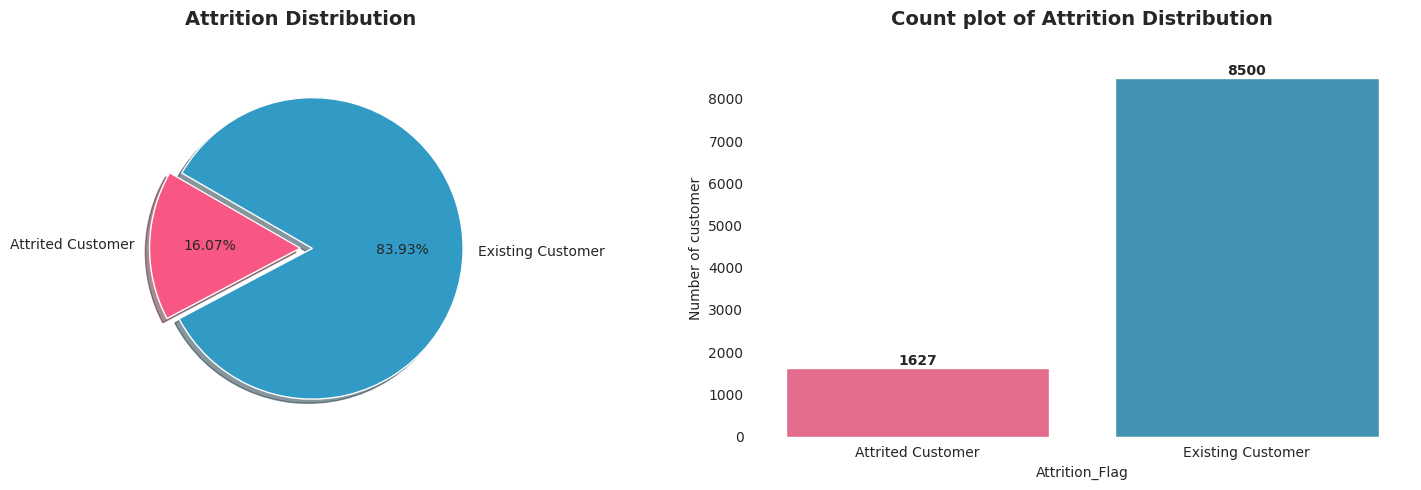

In [25]:
attrition_Distribution = df_customer_churn["Attrition_Flag"].value_counts().loc[["Attrited Customer", "Existing Customer"]]
fig, ax = plt.subplots(nrows = 1, ncols = 2, sharey = False, figsize = (15,5))

ax[0].pie(
    attrition_Distribution,
    labels = ["Attrited Customer", "Existing Customer"],
    colors = color(n_colors = 2),
    autopct = '%1.2f%%',
    startangle = 150,
    explode = (0, 0.08),
    shadow = True
)

ax[0].set_title("Attrition Distribution", weight = 'bold', fontsize = 14, pad = 25)

sns.countplot(data = df_customer_churn, x = "Attrition_Flag", palette = color(n_colors = 2), ax = ax[1])
ax[1].set_facecolor('white') 
ax[1].set_title("Count plot of Attrition Distribution", weight = "bold", fontsize = 14, pad = 25)

for container in ax[1].containers:
    ax[1].bar_label(container, fmt = '%d', label_type = 'edge', fontsize = 10, weight = "bold")

ax[1].set_ylabel("Number of customer")
sns.despine(ax = ax[1], top = True, right = True, left = False, bottom = False)

plt.tight_layout()
plt.show()

###  Insight
- Around `16.07%` customers have attrited, which reflects a realistic churn rate in the banking sector.
- Altgough the data is imbalanced, it is not incorrect - it naturally reflects customer behaviour.

## Numerical Feature Distribution

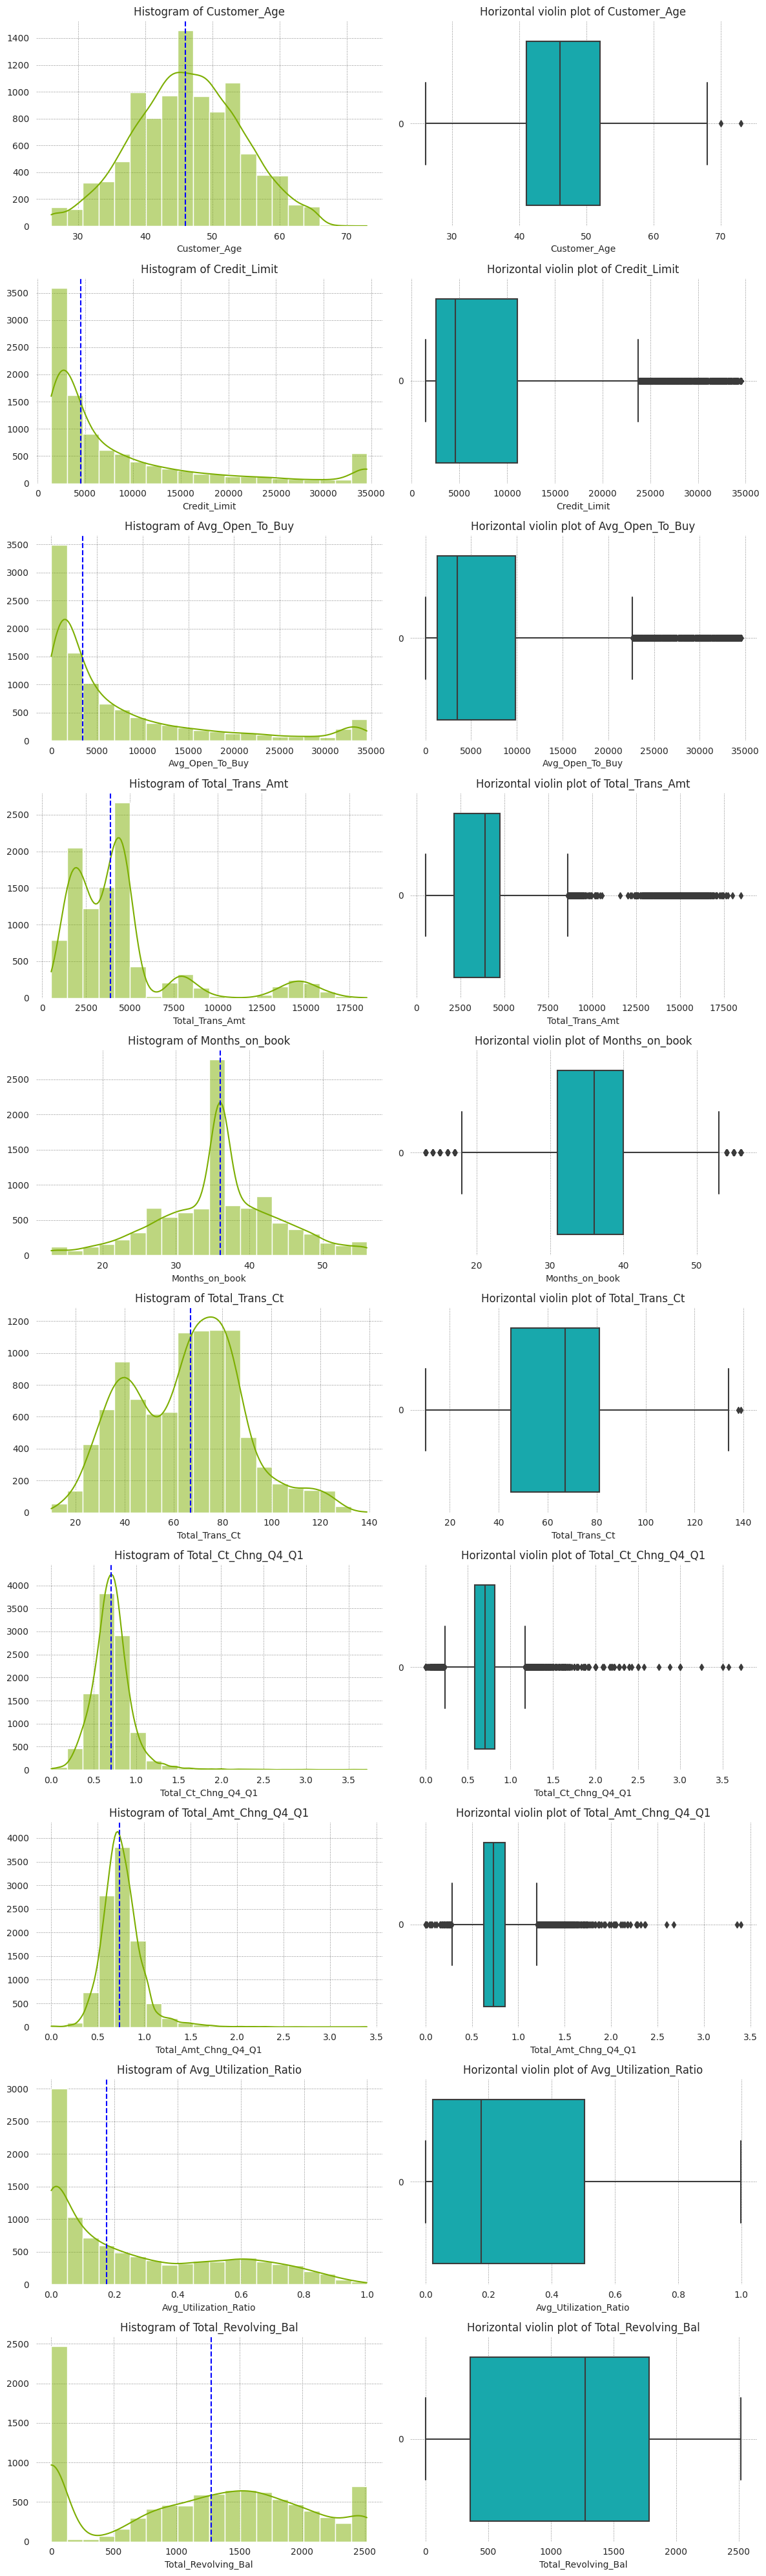

In [26]:
def plot_numerical_feature_distribution (df = df_customer_churn, numerical_features = num_features):
    fig, axes = plt.subplots(len(numerical_features), 2, figsize=(12, len(numerical_features)*4))
    axes = np.atleast_2d(axes)

    for i, feature in enumerate(numerical_features):
        sns.histplot(data = df[feature], color = '#7CAE00', bins = 20, kde = True, ax = axes[i, 0])
        axes[i,0].set_title(f"Histogram of {feature}")
        axes[i,0].set_ylabel("")
        axes[i,0].set_facecolor('white') 
        axes[i,0].grid(color = 'gray', linestyle = ":", linewidth = 0.7)
        axes[i,0].axvline(df[feature].median(), color = 'blue', linestyle = "--", label = "Median Train")

        sns.boxplot(data = df[feature], color = "#00BFC4", orient = "h", ax = axes[i,1])
        axes[i,1].set_title(f"Horizontal violin plot of {feature}")
        axes[i,1].set_xlabel(feature)
        axes[i,1].set_facecolor('white') 
        axes[i,1].grid(color = 'gray', linestyle = ":", linewidth = 0.7)

    plt.tight_layout()
    plt.show()

plot_numerical_feature_distribution()

In [27]:
def check_skewness (data = df_customer_churn, numerical_features = num_features, highlight = True, sort = True):
    skewness_dict = {}
    skew_feature = []

    for feature in numerical_features:
        skew = data[feature].skew(skipna = True)
        skewness_dict[feature] = skew

    skew_df = pd.DataFrame.from_dict(skewness_dict, orient = 'index', columns = ['Skewness'])
    if sort: 
        skew_df = skew_df.reindex(skew_df["Skewness"].abs().sort_values(ascending = False).index)
    else:
        pass

    print(f"\nSkewness in Dataset")
    print('-'*70)
    print(f"{'Feature':<30} | {'Skewness':<10} | {'Remark'}")
    print('-'*70)

    for feature, row in skew_df.iterrows():
        skew = row['Skewness']
        abs_skew = abs(skew)
        if abs_skew > 1:
            remark = 'Highly Skewed'
            color = "\033[91m"
        elif abs_skew > 0.5:
            remark = 'Moderately Skewed'
            color = "\033[93m"  
        else:
            remark = 'Approximately Symmetric'
            color = ""
        endc = "\033[0m" if color else ""

        if highlight and color:
            print(f"{color}{feature:<30} | {skew:>+10f} | {remark}{endc}")
            skew_feature.append(feature)
        else:
            print(f"{feature:<30} | {skew:>+10f} | {remark}")

    print('-'*70)
    return skew_feature, skew_df

skew_feature, skew_df = check_skewness()


Skewness in Dataset
----------------------------------------------------------------------
Feature                        | Skewness   | Remark
----------------------------------------------------------------------
Total_Ct_Chng_Q4_Q1            |  +2.064030 | Highly Skewed
Total_Trans_Amt                |  +2.041003 | Highly Skewed
Total_Amt_Chng_Q4_Q1           |  +1.732064 | Highly Skewed
Credit_Limit                   |  +1.666726 | Highly Skewed
Avg_Open_To_Buy                |  +1.661696 | Highly Skewed
Avg_Utilization_Ratio          |  +0.718008 | Moderately Skewed
Total_Trans_Ct                 |  +0.153673 | Approximately Symmetric
Total_Revolving_Bal            |  -0.148837 | Approximately Symmetric
Months_on_book                 |  -0.106565 | Approximately Symmetric
Customer_Age                   |  -0.033605 | Approximately Symmetric
----------------------------------------------------------------------


### Insights on Numerical Feature Distributions:
**Shape and Spread of Distribution:**
- **Histrograms** reveal that all features are distributed fairly evenly across their respective ranges.
- **Box Plot** confirms that the central 50% of values (the interquartile range), and the whiskers (showing the range).

**Skewness Analysis:**
- The **skewness values** for numerical features (`Total_Trans_Ct`, `Months_on_book`, `Customer_Age` and `Total_Revolving_Bal`) in dataset are less than 0.5, indicating that the distributions are **approximately symmetric**. which means:
- The features: `Total_Ct_Chng_Q4_Q1`, `Total_Trans_Amt`, `Total_Amt_Chng_Q4_Q1`, `Credit_Limit`, `Avg_Open_To_Buy`, `Avg_Utilization_Ratio`  have **skewness values** greater than 0.5, indicating that the distributions are **Highly/Moderately symmetric**. Many model assumes **normal distribution** but in reality data points may not be perfectly symmetric. If the data are skewed, then this kind of model will always underestimate the skewness risk. The more the data is skewed the less accurate the model will be. We need to handle skewness in the data to create a more accurate preditictive model.

## Correlation Analysis of Numerical Features

1. **What is correlation?**
   Correlation measures the strength and direction of a linear relationship between two variables.
- The correlation coefficient (denoted by **r**) ranges from **-1 to 1**.

2. **Interpretation of Correlation Values:**
   | Value of r | Relationship Type           | Interpretation                               |
| ---------- | --------------------------- | -------------------------------------------- |
| `r ≈ 1`    | Strong positive correlation | As X increases, Y also increases linearly    |
| `r ≈ -1`   | Strong negative correlation | As X increases, Y decreases linearly         |
| `r ≈ 0`    | No linear correlation       | No clear linear relationship between X and Y |

**Common interpretation of |r|**
![](https://i.ibb.co/TQ3FbQK/correlation.png)

3. **Pearson Correlation Formula**

$$
r = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum (x_i - \bar{x})^2 \cdot \sum (y_i - \bar{y})^2}}
$$

* $x_i, y_i$: observed values
* $\bar{x}, \bar{y}$: sample means of X and Y.

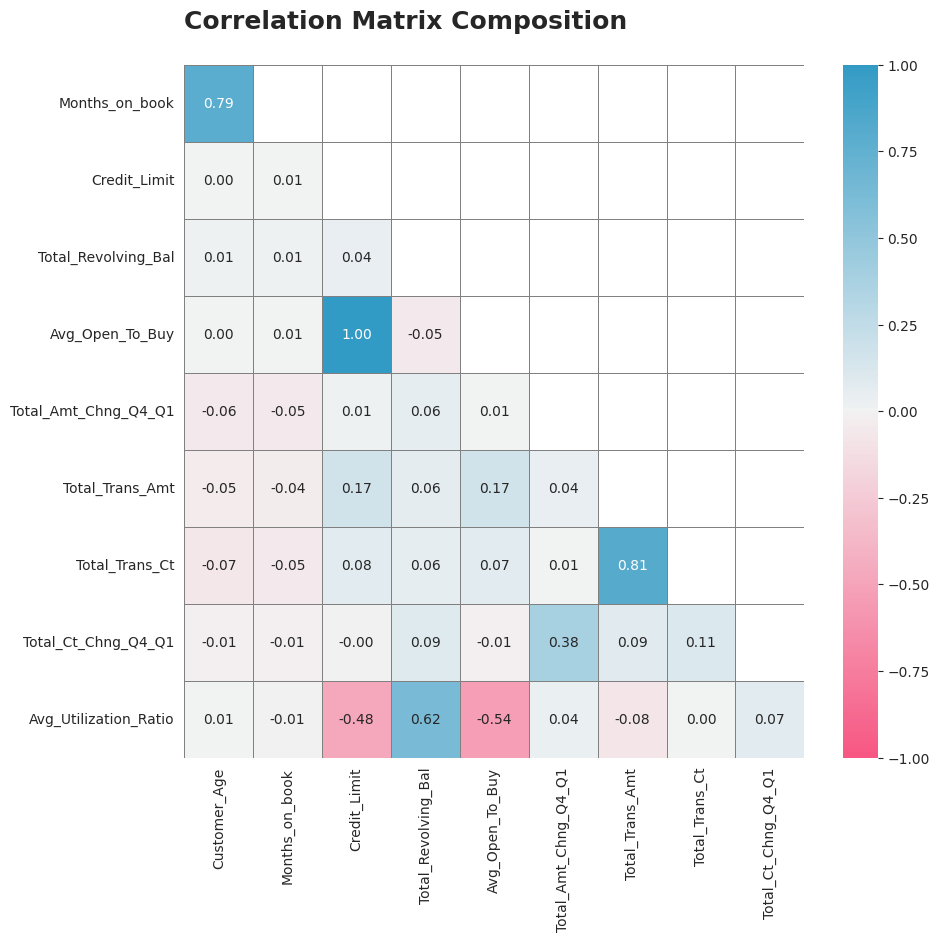

In [28]:
corr_matrix = df_customer_churn.drop(columns = 'CLIENTNUM', axis = 1).corr(numeric_only = True)

ones_corr = np.ones_like(corr_matrix, dtype = bool)
mask = np.triu(ones_corr)
adjusted_mask = mask[1:, :-1]
adjusted_cereal_corr = corr_matrix.iloc[1:, :-1]

fig, ax = plt.subplots(figsize=(10,9))
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

sns.heatmap(data=adjusted_cereal_corr, mask=adjusted_mask,
            annot=True, fmt=".2f", cmap=cmap,
            vmin=-1, vmax=1, linecolor="grey", linewidths=0.5)
title = "Correlation Matrix Composition\n"
ax.set_facecolor('white') 
ax.set_title(title, loc="left", fontsize=18, weight="bold");

### Insights from Correlation Analysis of Numerical Features

1. **Overall Weak Correlation Pattern:**
- Most numerical features exhibit **correlation coefficients near 0.**
- Indicates **minimal linear dependency** among feature pairs.
> **Implication**: No sign of multicollinearity → suitable for models that assume feature independence (e.g., **Logistic Regression**) as well as **tree-based models** (e.g., RandomForest, XGBoost).

2. **Notable Positive Correlations:**

| Feature Pair                                    | Correlation | Interpretation                                                                        |
| ----------------------------------------------- | ----------- | ------------------------------------------------------------------------------------- |
| `Total_Trans_Ct` & `Total_Trans_Amt`            | **0.81**    | Higher transaction count usually corresponds to higher transaction amounts.           |
| `Months_on_book` & `Customer_Age`               | **0.79**    | Older customers tend to have longer banking relationships.                            |
| `Total_Ct_Chng_Q4_Q1` & `Total_Amt_Chng_Q4_Q1`  | **0.38**    | Changes in transaction frequency moderately align with changes in transaction amount. |
| `Avg_Utilization_Ratio` & `Total_Revolving_Bal` | **0.62**    | Customers with high utilization tend to carry larger revolving balances.              |

3. **Moderate Negative Correlations:**
| Feature Pair                                | Correlation | Interpretation                                                             |
| ------------------------------------------- | ----------- | -------------------------------------------------------------------------- |
| `Avg_Utilization_Ratio` & `Avg_Open_To_Buy` | **-0.54**   | Higher utilization reduces available credit → inverse relationship.        |
| `Avg_Utilization_Ratio` & `Credit_Limit`    | **-0.48**   | Customers with higher credit limits generally use a smaller portion of it. |

**Summary**

| Observation                                     | Actionable Insight                                       |
| ----------------------------------------------- | -------------------------------------------------------- |
| Weak overall correlations                       | Features are not redundant → preserve full feature set   |
| Strong link: `Trans_Ct` ↔ `Trans_Amt`           | Confirms purchase frequency correlates with volume       |
| `Avg_Utilization_Ratio` as behavioral indicator | Valuable signal for **credit risk and churn prediction** |

## Categorical Feature Distributions

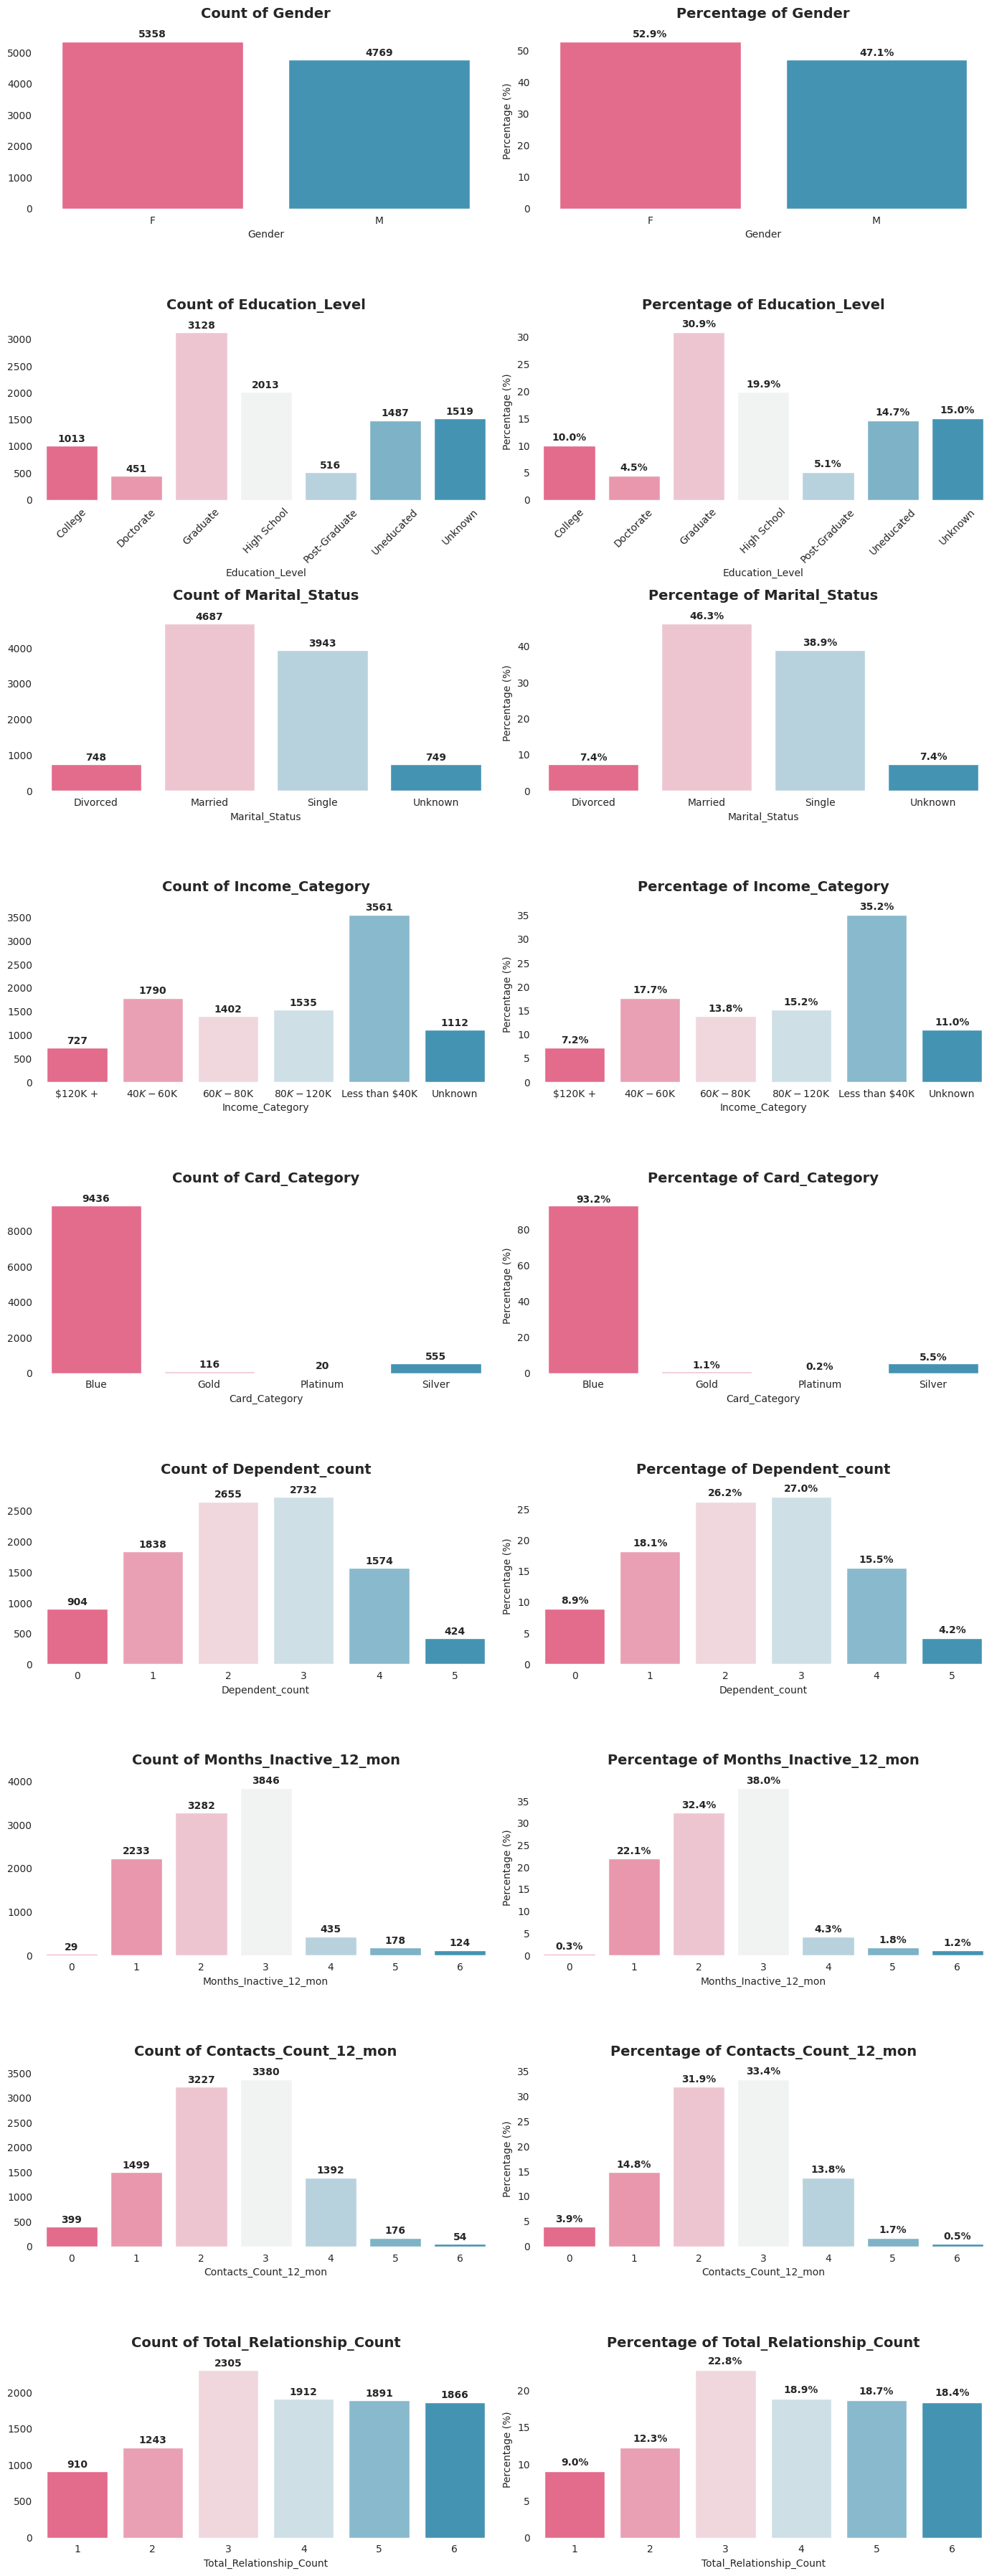

In [29]:
def plot_categorical_feature_distributions (df, cat_features):
    fig, ax = plt.subplots(len(cat_features), 2, figsize = (14, len(cat_features)*4))
    ax = np.atleast_2d(ax)

    for i, feature in enumerate(cat_features):
        sns.countplot(data = df, x = feature, ax = ax[i,0], palette = color(n_colors = len(df[feature].unique())))
        ax[i,0].set_title(f"Count of {feature}", fontsize = 14, pad = 15, weight = 'bold')
        ax[i,0].set_xlabel(feature)

        if feature == 'Education_Level':
            ax[i,0].set_xticklabels(labels = ax[i,0].get_xticklabels(), rotation = 45)

        ax[i,0].set_facecolor('white') 
        ax[i,0].set_ylabel("")
        sns.despine(ax = ax[i,0], top = True, right = True)

        # Count labels on top
        for p in ax[i,0].patches:
            height = p.get_height()
            x = p.get_x() + p.get_width() / 2
            ax[i,0].text(x, height + max(df[feature].value_counts()) * 0.01, f"{int(height)}", ha = 'center', va = 'bottom', fontsize = 10, fontweight = 'bold')


        feature_counts = df[feature].value_counts(normalize = True).sort_index()
        percentage_df = feature_counts.mul(100).round(2).reset_index()
        percentage_df.columns = [feature, "Percentage"]

        sns.barplot(data = percentage_df, x = feature, y = "Percentage", ax = ax[i,1], palette=color(n_colors=len(feature_counts)))

        ax[i,1].set_title(f"Percentage of {feature}", fontsize = 14, pad = 15, weight = 'bold')
        ax[i,1].set_ylabel("Percentage (%)")

        if feature == 'Education_Level':
            ax[i,1].set_xticklabels(labels = ax[i,1].get_xticklabels(), rotation = 45)

        ax[i,1].set_facecolor('white') 
        ax[i,1].set_xlabel(feature)
        sns.despine(ax = ax[i,1], top = True, right = True)

        # % Labels on top
        for p in ax[i,1].patches:
            height = p.get_height()
            x = p.get_x() + p.get_width() / 2
            # ax[i,1].text(x, height + 0,5, f"{height: .1f}%", ha = "center", va = "bottom", fontsize = 10, fontweight = "bold")
            ax[i, 1].text(x, height + 0.5,
                          f"{height:.1f}%",
                          ha="center", va="bottom", fontsize=10, fontweight="bold")

    plt.tight_layout()
    plt.show()

if "Attrition_Flag" in cat_features:
    cat_features.remove("Attrition_Flag")
plot_categorical_feature_distributions(df=df_customer_churn, cat_features=cat_features)

### Insights on Categorical Feature Distribution:

1. **Attrition Flag (Target Variable):**
- **Existing customers** account for **83.9%** → the dataset is clearly **imbalanced**.
- → Apply techniques like **SMOTE**, **class weights**, or **threshold tuning**.

2. **Gender:**
- Nearly balanced: **Female (52.9%) and Male (47.1%)**
- → No special handling required.

3. **Education Level:**
- **Graduate (30.9%)** and **Uneducated (24.7%)** dominate.
- **Doctorate** and **Post-Graduate** are rare (<10%) → consider grouping.
- **Unknown = 15.0%** → retained and captured via `is_unknown_education_level`.
  
4. **Marital Status:**
- **Married** customers dominate (**46.3%**) → indicates stable demographic.
- **Unknown = 7.4%** → retained or grouped; already represented by `is_unknown_marital_status`.

5. **Income Category:**
- Most customers earn **less than \$40K (35.2%)**.
- High-income group (`> \$120K`) only **7.2%** → can be grouped as `"High income"`.
- **Unknown = 11.0%** → potentially meaningful → tracked via `is_unknown_income_category`.
  
6. **Card Category:**
- **Blue cards** dominate (**93.2%**); other types are rare.
- → Recommend grouping into `"Blue"` vs `"Other"` to simplify modeling.

7. **Depenedent Count:**
- Most customers have **1–3 dependents**.
- Very few have 5 → consider grouping `"4+"`.

8. **Months Inactive (Last 12 months):**
- Inactivity mainly spans **2–3 months** → generally stable.
- Very few customers are inactive for more than 4 months.

10. **Contact Count (Last 12 months):**
- **2–3 contacts/year** is most common (**\~65%**).
- Customers with **0–1 contact** may be **disengaged or at risk** → investigate churn link.

11. **Total Relationship Count:**
- Fairly even spread across 2–6 products.
- Only **9%** have just 1 relationship → possibly at higher churn risk.

**Summary & Recommended Actions**

| Observation                               | Suggested Action                                            |
| ----------------------------------------- | ----------------------------------------------------------- |
| Target imbalance (`Attrition_Flag`)       | Use **SMOTE**, **class weighting**, or **threshold tuning** |
| Skewed category distributions             | **Group rare levels** to improve model stability            |
| "Unknown" values in categorical features  | Keep "Unknown" values.                                      |
| Behavioral indicators (e.g., low contact) | Investigate as **potential churn predictors**               |
| All categorical features                  | Ready for **One-hot or Ordinal Encoding** 

## Bivariate Analysis

In [30]:
from IPython.core.display import HTML

def bivariate_percent_plot (cat, df, figsize = (15,6), order = None, rot = 0):
    display(HTML(f"<h2 style='text-align:center; font-size:22px; color:blue;'><b>Distribution of {cat} by Attrition_Flag</b></h2>"))
    fig, ax = plt.subplots(nrows = 1, ncols = 2, sharey = False, figsize = figsize)

    # Plot 1: Total number of each category by Attrition Flag
    grouped = df.groupby([cat, "Attrition_Flag"]).size().unstack(fill_value = 0)
    percentages = grouped.div(grouped.sum(axis = 1), axis = 0) * 100

    if order is not None:
        percentages = percentages.loc[order]
        labels = order
    else:
        labels = percentages.index

    cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap = True)
    ax[0] = percentages.plot(kind = 'bar', stacked = True, cmap = cmap, ax = ax[0], use_index = True)

    for container in ax[0].containers:
        ax[0].bar_label(container, fmt = '%1.0f%%', label_type = 'center', weight = 'bold', fontsize = 10)

    ax[0].set_facecolor('white') 
    ax[0].set_title(f"Percentage Attrition by {cat}", fontsize = 14, weight = 'bold')
    ax[0].set_xlabel(f"{cat}", fontsize = 12)
    ax[0].set_ylabel("% Attrition Rate", fontsize = 12)

    if cat in ["Education_Level", "Income_Category"]:
        ax[0].set_xticklabels(labels = labels, rotation = 45)
    else:
        ax[0].set_xticklabels(labels = labels, rotation = rot)

    ax[0].legend_.remove()

    sns.despine(left = False, bottom = False, ax = ax[0])

    # Plot 2: 
    sns.countplot(data = df, hue = "Attrition_Flag", x = cat, palette = color(n_colors = 2), ax = ax[1], order = order)

    for container in ax[1].containers:
        ax[1].bar_label(container, fmt = '%d', label_type = 'edge', fontsize = 10, weight = 'bold')

    ax[1].set_facecolor('white') 
    ax[1].set_title(f"Attrition by {cat}", fontsize = 14, weight = 'bold')
    ax[1].set_xlabel(f"{cat}", fontsize = 12)
    ax[1].set_ylabel("Number of Customer", fontsize = 12)
    ax[1].legend(title="Attrition", bbox_to_anchor=(1.05, 1), loc="upper left")

    if cat in ["Education_Level", "Income_Category"]:
        ax[0].set_xticklabels(labels = labels, rotation = 45)
    else:
        ax[0].set_xticklabels(labels = labels, rotation = rot)

    sns.despine(left=False, bottom=False, ax=ax[1])
    plt.tight_layout()
    plt.show()

    cal_ChiSquare(cat_feature = cat, target_feature = "Attrition_Flag", df = df, show_residuals = True)

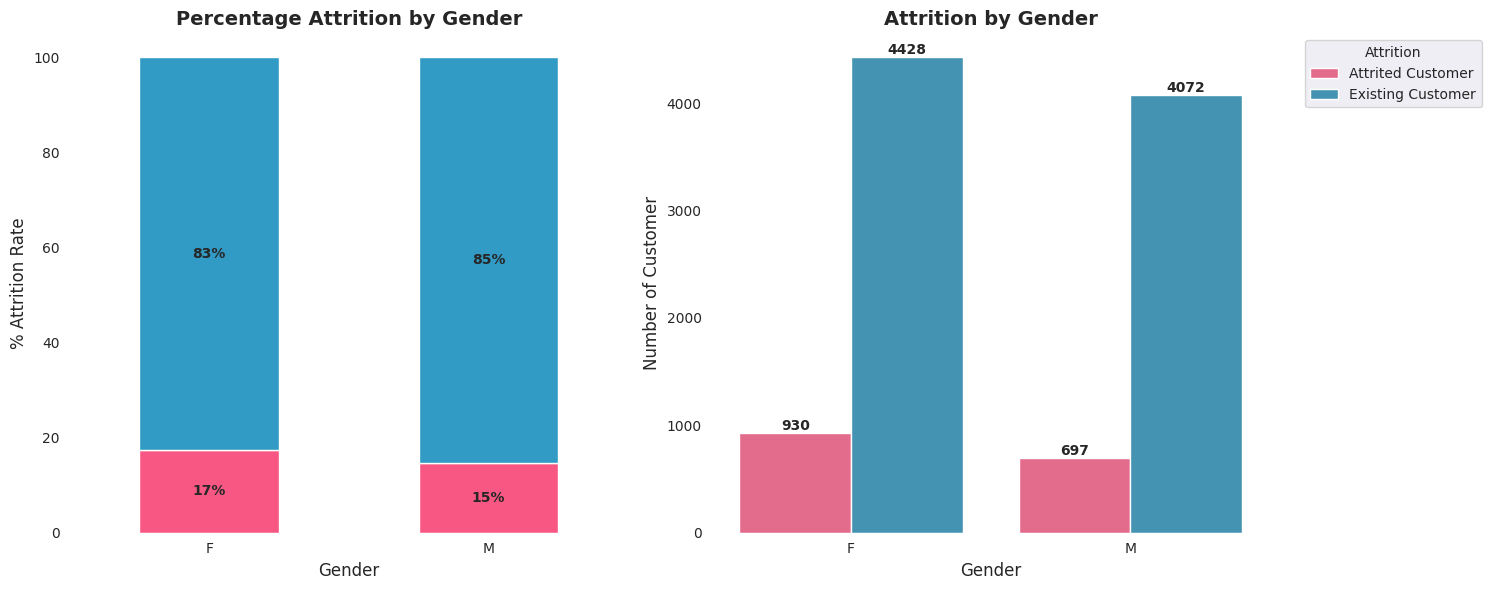


Chi-Square Test of Independence: Gender vs Attrition_Flag
Chi-Squared statistic: 13.866
Degrees of freedon: 1
p-value: 0.000196
Result: p-value < 0.05 → Reject H₀
→ There is a **statistically significant association** between 'Gender' and 'Attrition_Flag'.

Standardized Residuals:
Attrition_Flag  Attrited Customer  Existing Customer
Gender                                              
F                            2.36              -1.03
M                           -2.50               1.09


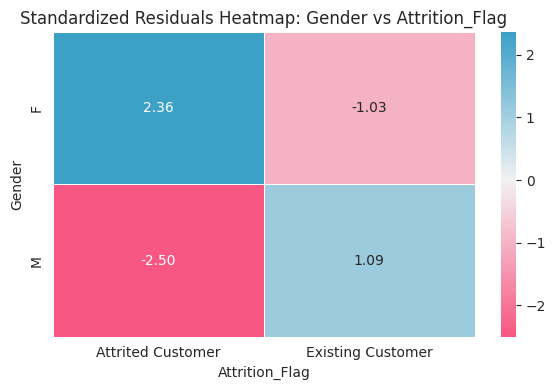

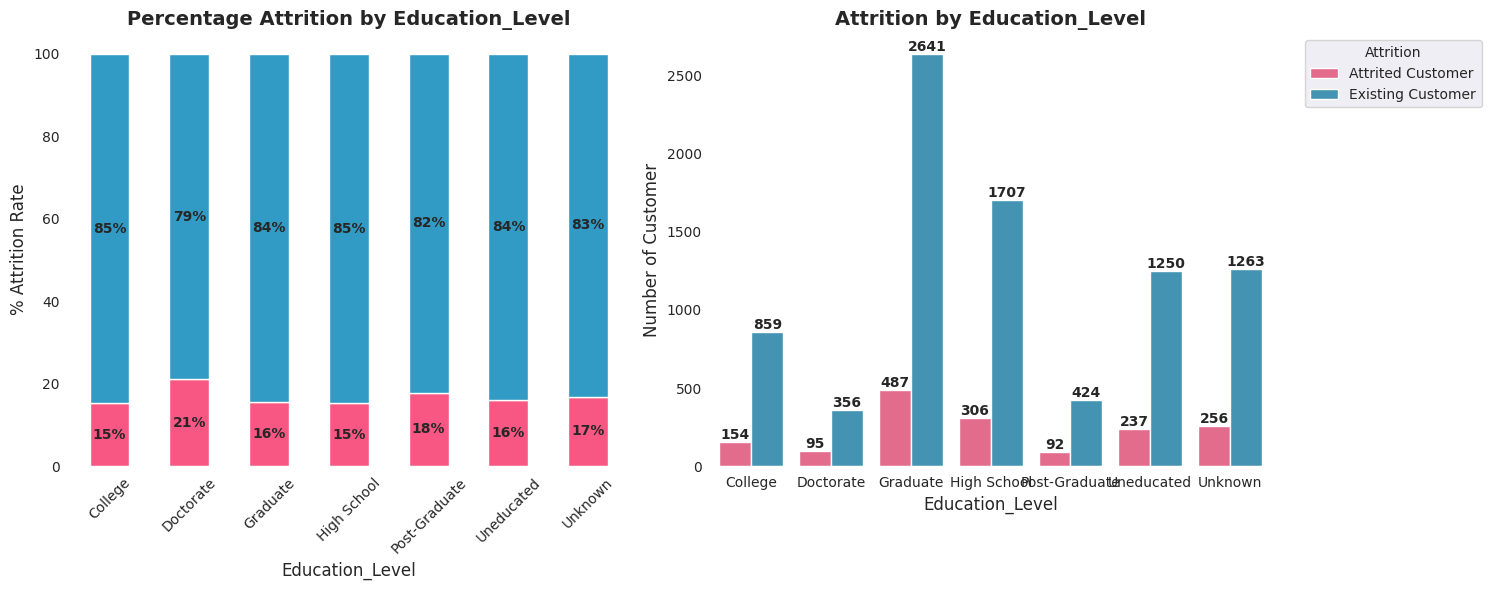


Chi-Square Test of Independence: Education_Level vs Attrition_Flag
Chi-Squared statistic: 12.511
Degrees of freedon: 6
p-value: 0.051489
Result: p-value ≥ 0.05 → Fail to reject H₀
→ No statistically significant association between 'Education_Level' and 'Attrition_Flag'.

Standardized Residuals:
Attrition_Flag   Attrited Customer  Existing Customer
Education_Level                                      
College                      -0.69               0.30
Doctorate                     2.65              -1.16
Graduate                     -0.69               0.30
High School                  -0.97               0.42
Post-Graduate                 1.00              -0.44
Uneducated                   -0.12               0.05
Unknown                       0.77              -0.33


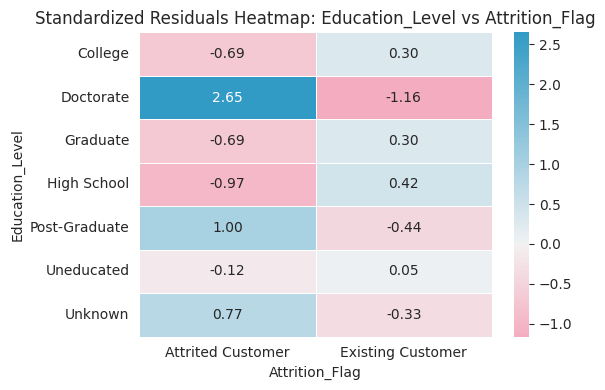

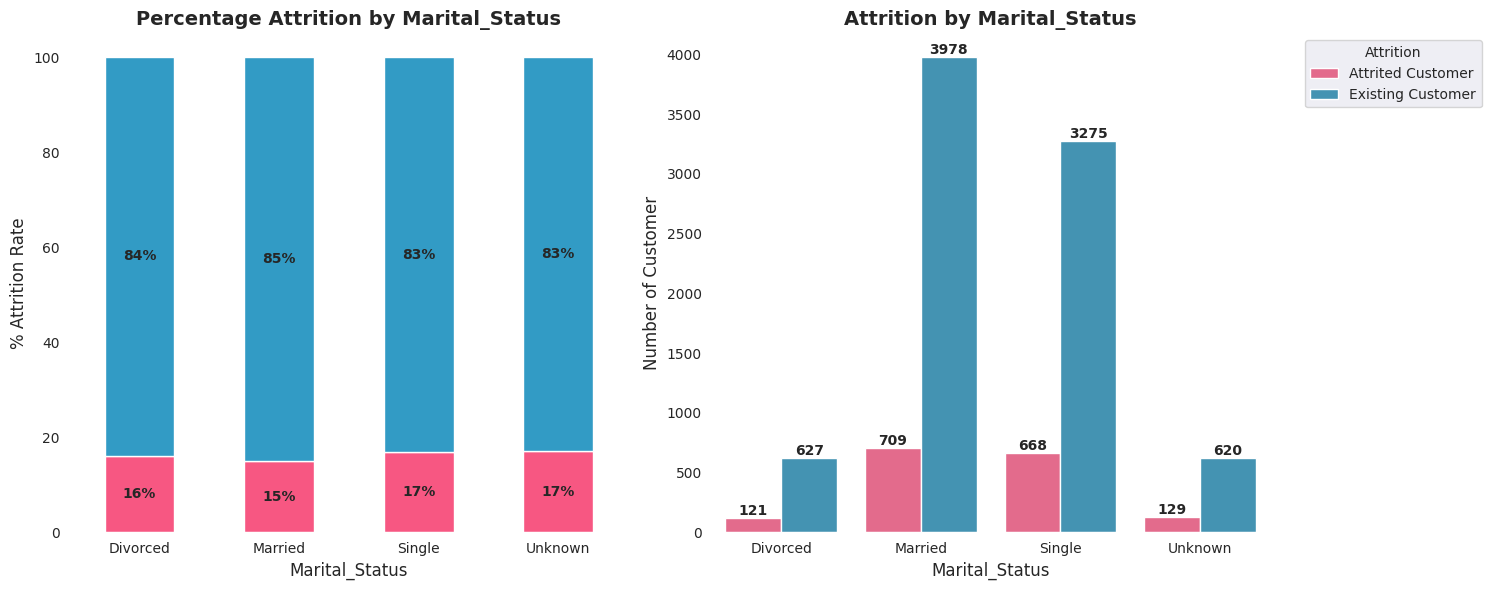


Chi-Square Test of Independence: Marital_Status vs Attrition_Flag
Chi-Squared statistic: 6.056
Degrees of freedon: 3
p-value: 0.108913
Result: p-value ≥ 0.05 → Fail to reject H₀
→ No statistically significant association between 'Marital_Status' and 'Attrition_Flag'.

Standardized Residuals:
Attrition_Flag  Attrited Customer  Existing Customer
Marital_Status                                      
Divorced                     0.08              -0.03
Married                     -1.60               0.70
Single                       1.37              -0.60
Unknown                      0.79              -0.35


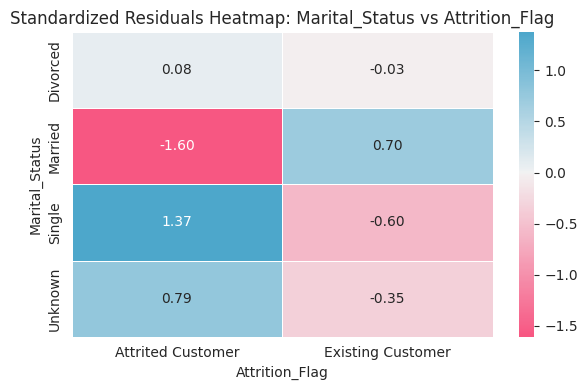

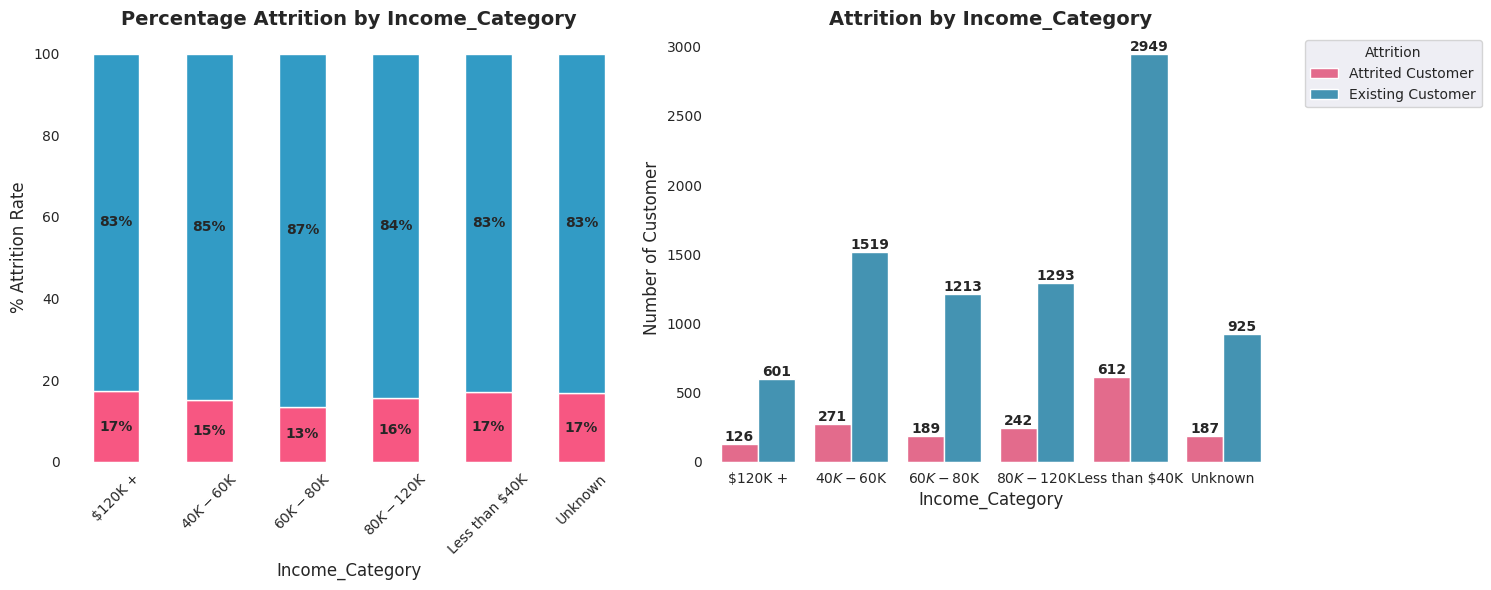


Chi-Square Test of Independence: Income_Category vs Attrition_Flag
Chi-Squared statistic: 12.832
Degrees of freedon: 5
p-value: 0.025002
Result: p-value < 0.05 → Reject H₀
→ There is a **statistically significant association** between 'Income_Category' and 'Attrition_Flag'.

Standardized Residuals:
Attrition_Flag   Attrited Customer  Existing Customer
Income_Category                                      
$120K +                       0.85              -0.37
$40K - $60K                  -0.98               0.43
$60K - $80K                  -2.42               1.06
$80K - $120K                 -0.29               0.13
Less than $40K                1.67              -0.73
Unknown                       0.62              -0.27


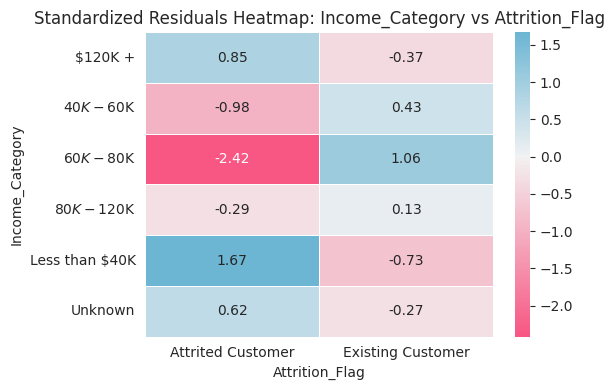

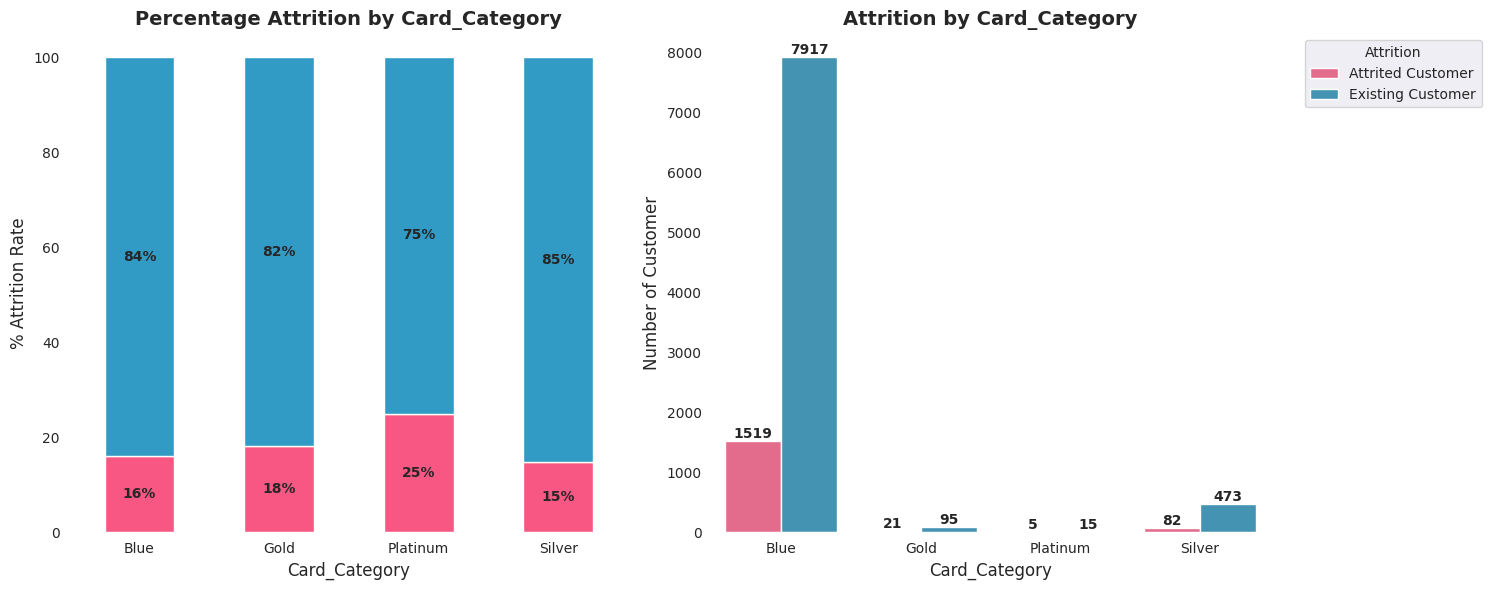


Chi-Square Test of Independence: Card_Category vs Attrition_Flag
Chi-Squared statistic: 2.234
Degrees of freedon: 3
p-value: 0.525238
Result: p-value ≥ 0.05 → Fail to reject H₀
→ No statistically significant association between 'Card_Category' and 'Attrition_Flag'.

Standardized Residuals:
Attrition_Flag  Attrited Customer  Existing Customer
Card_Category                                       
Blue                         0.08              -0.03
Gold                         0.55              -0.24
Platinum                     1.00              -0.44
Silver                      -0.76               0.33


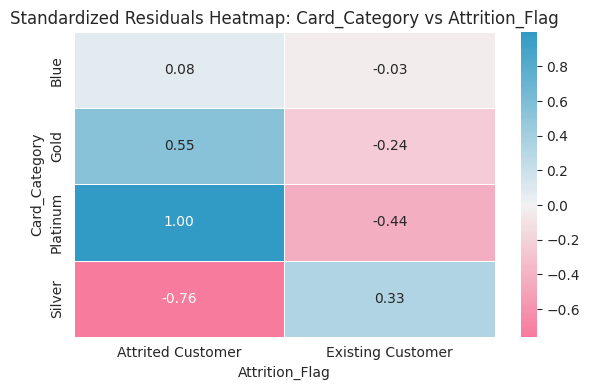

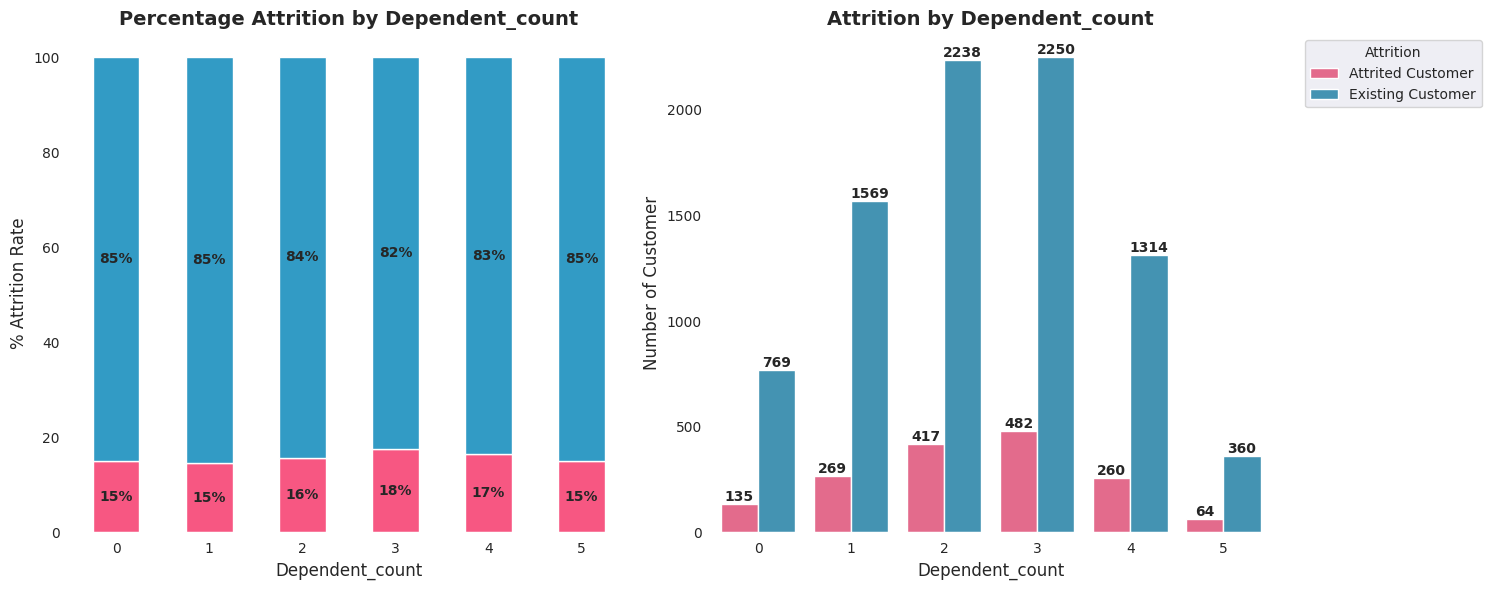


Chi-Square Test of Independence: Dependent_count vs Attrition_Flag
Chi-Squared statistic: 9.476
Degrees of freedon: 5
p-value: 0.091505
Result: p-value ≥ 0.05 → Fail to reject H₀
→ No statistically significant association between 'Dependent_count' and 'Attrition_Flag'.

Standardized Residuals:
Attrition_Flag   Attrited Customer  Existing Customer
Dependent_count                                      
0                            -0.85               0.37
1                            -1.53               0.67
2                            -0.46               0.20
3                             2.06              -0.90
4                             0.45              -0.20
5                            -0.50               0.22


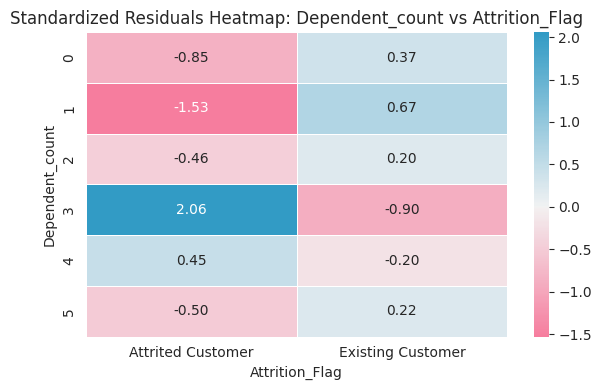

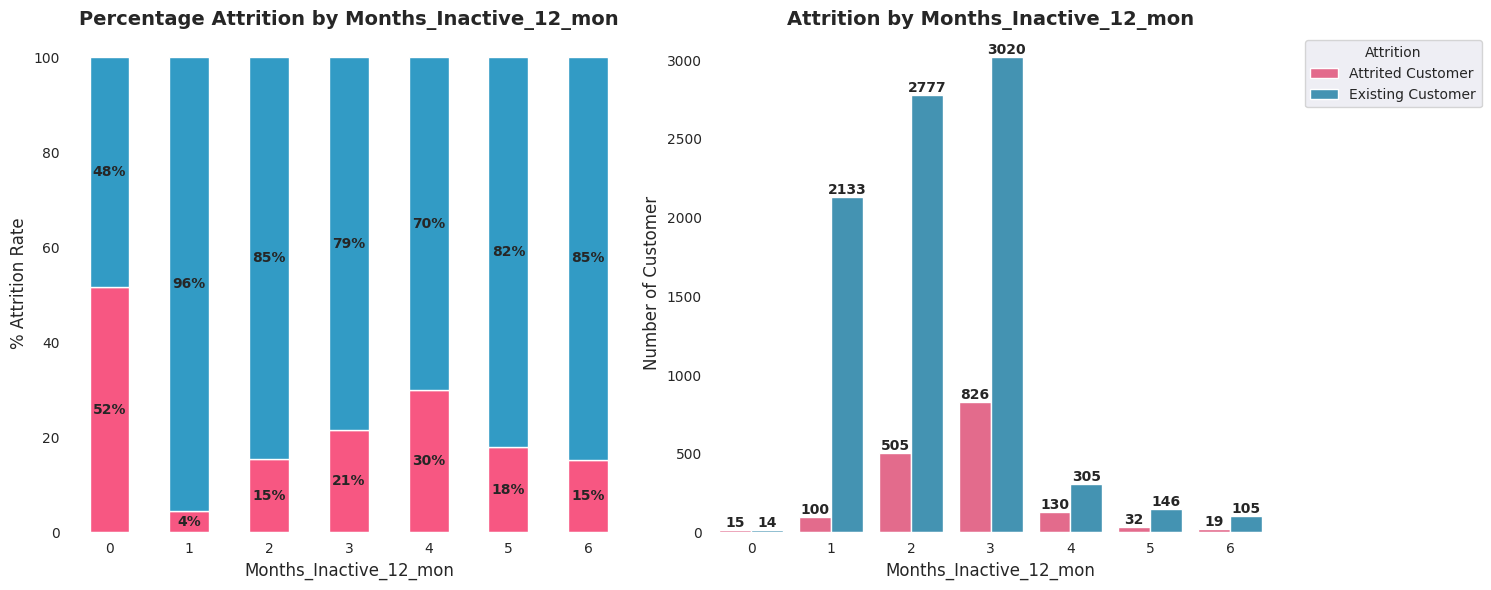


Chi-Square Test of Independence: Months_Inactive_12_mon vs Attrition_Flag
Chi-Squared statistic: 396.456
Degrees of freedon: 6
p-value: 0.000000
Result: p-value < 0.05 → Reject H₀
→ There is a **statistically significant association** between 'Months_Inactive_12_mon' and 'Attrition_Flag'.

Standardized Residuals:
Attrition_Flag          Attrited Customer  Existing Customer
Months_Inactive_12_mon                                      
0                                    4.79              -2.10
1                                  -13.66               5.98
2                                   -0.97               0.42
3                                    8.37              -3.66
4                                    7.19              -3.15
5                                    0.64              -0.28
6                                   -0.21               0.09


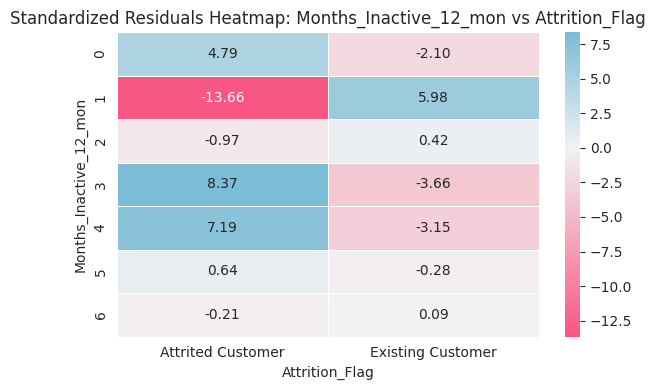

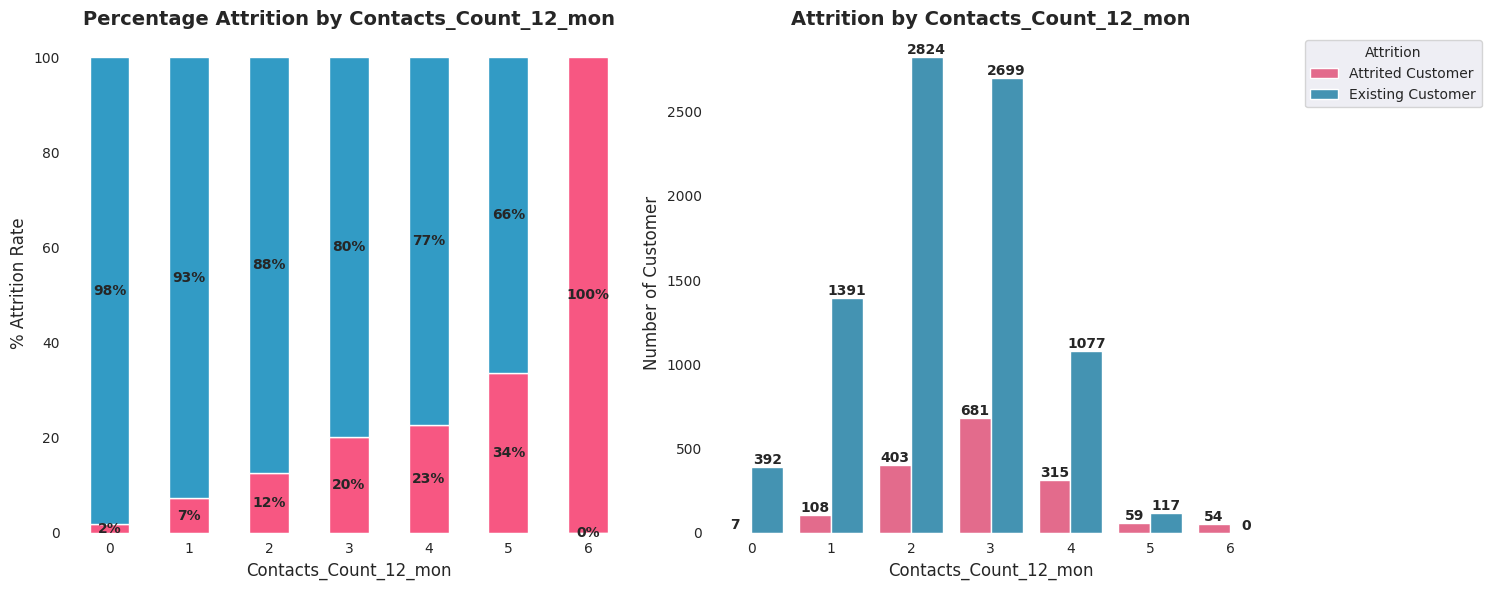


Chi-Square Test of Independence: Contacts_Count_12_mon vs Attrition_Flag
Chi-Squared statistic: 586.638
Degrees of freedon: 6
p-value: 0.000000
Result: p-value < 0.05 → Reject H₀
→ There is a **statistically significant association** between 'Contacts_Count_12_mon' and 'Attrition_Flag'.

Standardized Residuals:
Attrition_Flag         Attrited Customer  Existing Customer
Contacts_Count_12_mon                                      
0                                  -7.13               3.12
1                                  -8.56               3.74
2                                  -5.07               2.22
3                                   5.92              -2.59
4                                   6.11              -2.67
5                                   5.78              -2.53
6                                  15.39              -6.73


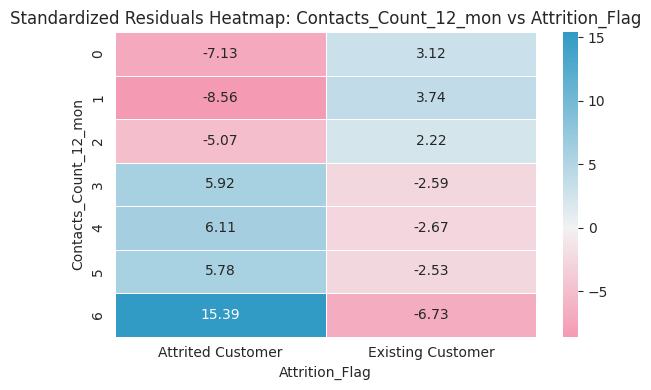

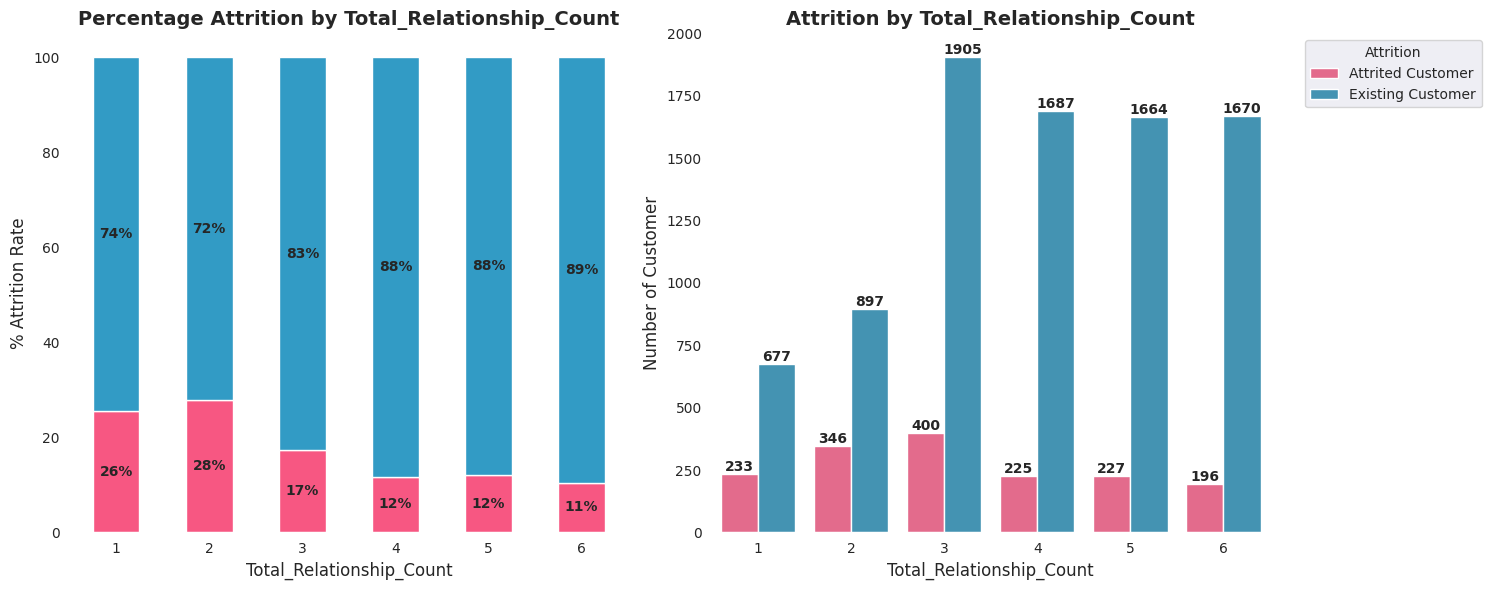


Chi-Square Test of Independence: Total_Relationship_Count vs Attrition_Flag
Chi-Squared statistic: 284.068
Degrees of freedon: 5
p-value: 0.000000
Result: p-value < 0.05 → Reject H₀
→ There is a **statistically significant association** between 'Total_Relationship_Count' and 'Attrition_Flag'.

Standardized Residuals:
Attrition_Flag            Attrited Customer  Existing Customer
Total_Relationship_Count                                      
1                                      7.18              -3.14
2                                     10.35              -4.53
3                                      1.54              -0.67
4                                     -4.69               2.05
5                                     -4.41               1.93
6                                     -5.99               2.62


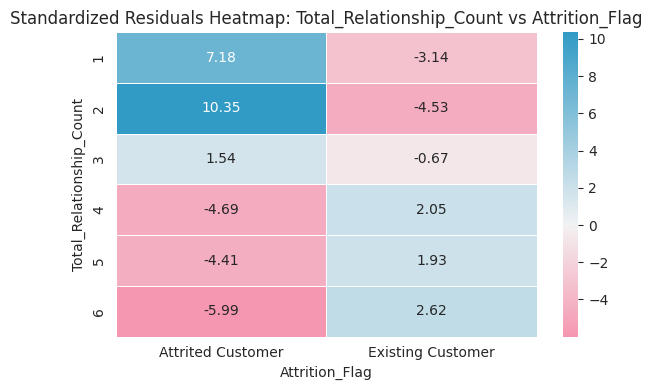

In [31]:
for feature in cat_features:
    bivariate_percent_plot(cat = feature, df = df_customer_churn)

### Insights for Categorical Features by Attrition:

1. **Gender:**
- Distribution is balanced: **Female (52.9%) and Male (47.1%)**
- **Statistically significant association** with churn (p = 0.0002)
- **Females are more likely to churn** (Residual = **+2.36**)
- **Males are less likely to churn** (Residual = **-2.50**)
- → Gender is a mild but meaningful predictor of attrition.
  
2. **Education_Level:**
- **No statistically significant association** with churn (p = 0.051)
- However, Doctorate users shown unusually high churn (Residual = +2.65), though the sample size is small to generalize.
- → Overall: Education is not a strong predictor of churn.
  
3. **Marital_Status:**
- Most customers are **Married** or **Single**.
- **No statistically significant association** with churn (p = 0.1089)
- Residuals show mild trends:
  - **Single:** higher tendency to churn (+1.37)
  - **Married:** more likely to stay (-1.60)
- → Overall: **Marital status is not a strong churn predictor**.
  
4. **Income Category:**
- **Statistically significant association** with churn (p = 0.025)
- Insights from standardized residuals:
  - **\$60K–\$80K** → significantly **less likely to churn** (**–2.42**) → *statistically meaningful*
  - **< \$40K** → slightly **more likely to churn** (**+1.67**) → *not statistically significant*
- → Income category is a **moderate churn predictor**, driven mainly by the \$60K–\$80K segment
  
5. **Card Category:**
- **No statistically significant association** with churn (p = 0.525)
- Residuals show **no meaningful deviation** (all |z| < 2)
  - **Platinum** and **Gold** slightly overrepresented among churned, but not statistically significant
- → **Card type is not a reliable predictor** of attrition.

6. **Dependent Count:**
- Most attrition customers have **1 and 3 dependents**
- **No statistically significant association** with churn (p = 0.091)
- Standardized residuals:
  - **3 dependents** → slightly **overrepresented** among churned customers (**+2.06**) → *significant*
  - Other groups show weak/no pattern (|z| < 2)
- → **Overall: weak signal**, may reconsider after grouping or binning.

7. **Months Inactive (12 Months):**
- **Strong statistically significant association** with churn (Chi² = 396.5, p < 0.00001)
- Standardized residuals reveal very clear patterns:
  - **1 month inactive** → strongly **negatively associated** with churn (**–13.66**)
    → customers inactive for only 1 month are **very unlikely to churn**
  - **3–4 months inactive** → strongly **positively associated** with churn
    (**+8.37**, **+7.19**) → these customers are **much more likely to churn**
  - **0 month inactive** → also higher attrition than expected (**+4.79**)
- → Inactivity is a **powerful behavioral signal** for predicting churn.

8. **Contacts Count (12 Months):**
- **Very strong statistical association** with churn (Chi² = 586.6, p < 0.00001)
- Standardized residuals show a **very strong churn pattern**:
  - **0–2 contacts/year** → **much less churn than expected**
    (Residual = –8.56 at 1 contact) → these customers are more **loyal**
  - **Frequent contacts (4–6 times/year)** → **more likely to churn than expected**
  - **6 contacts/year** → extremely **high churn signal** (Residual = **+15.39**)
- → Frequent contact may reflect **issues, dissatisfaction, or pre-churn behavior**.

9. **Total Relationship Count:**
- **Strong statistical association** with churn (Chi² = 284.1, p < 0.00001)
- Residuals indicate a **clear inverse relationship**:
  - Customers with **fewer relationships (1–2)** → **more likely to churn**
    (Residuals = **+7.18**, **+10.35** at 1–2 products)
  - Customers with **4–6 products** → **less likely to churn**
    (Residuals = **–4.69**, **–4.41**, **–5.99** respectively)
- → Total number of products is a **strong loyalty indicator** — more products, lower churn.

In [38]:
def perform_statistical_testing (feature, df = df_customer_churn, total_categories = 2, target_feature = 'Attrition_Flag'):
    cal_normal_test(cat_feature = target_feature, num_feature = feature, df = df)
    if total_categories == 2:
        cal_mannwhitneyu(df = df, cat_feature = target_feature, num_feature = feature)
    else:
        pass

def plot_numerical_distribution_by_attrition(feature, df = df_customer_churn, target_feature = "Attrition_Flag", order = None):
    display(HTML(f"<h2 style='text-align:center; font-size:22px; color:blue;'><b>Distribution of {feature} by Attrition_Flag</b></h2>"))

    df_summary_feature = df.groupby(by = target_feature, as_index = False)\
    .agg(
        Count = (feature, 'count'),
        Mean = (feature, 'mean'),
        Median = (feature, 'median'),
        Std = (feature, 'std')
    )
    df_suummary_feature = df_summary_feature.sort_values(by = 'Mean', ascending = False)

    summary_data = [
        ("Overall Mean", f"{df[feature].mean(): .2f}"),
        ("Overall Median", f"{df[feature].median()}"),
        ("Overall Std", f"{df[feature].std(): .2f}")
    ]

    summary_html = "<ul>" + "".join([f"<li><b>{k}:</b> {v}</li>" for k, v in summary_data]) + "</ul>"
    display(HTML(summary_html))
    display(df_summary_feature.style.background_gradient(cmap=cm).set_table_attributes('style="width:75%; margin:auto;"'))

    perform_statistical_testing(feature = feature, target_feature = target_feature)

    # Plot Distribution
    fig, ax = plt.subplots(figsize = (10, 6))
    sns.violinplot(x = target_feature, y = feature, data = df, hue = target_feature,
                   palette = color(n_colors=len(df[target_feature].unique())), ax = ax)
    ax.set_title(f"Violin plot of {feature} distribution by {target_feature}", pad=15, weight = "bold")
    ax.set_xlabel(target_feature, labelpad=10)
    ax.set_ylabel(feature, labelpad=10)
    plt.grid(axis="y", color="gray", linestyle=":", alpha=0.7)
    sns.despine(left=False, bottom=False, ax=ax)
    plt.tight_layout()
    plt.show()

D’Agostino and Pearson Normality Test for '{num_feature}' across '{cat_feature}' groups

Group: Existing Customer (n = 8500)
Statistic:  41.753
p-value:  0.00000
Interpretation: Data does not appear to follow a normal distribution.
Group: Attrited Customer (n = 1627)
Statistic:  9.556
p-value:  0.00841
Interpretation: Data does not appear to follow a normal distribution.
Mann–Whitney U Test for 'Customer_Age' by 'Attrition_Flag'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 6724539.5
p-value     : 0.07809994878128952

Result: No statistically significant difference between the two groups (Fail to reject H₀).


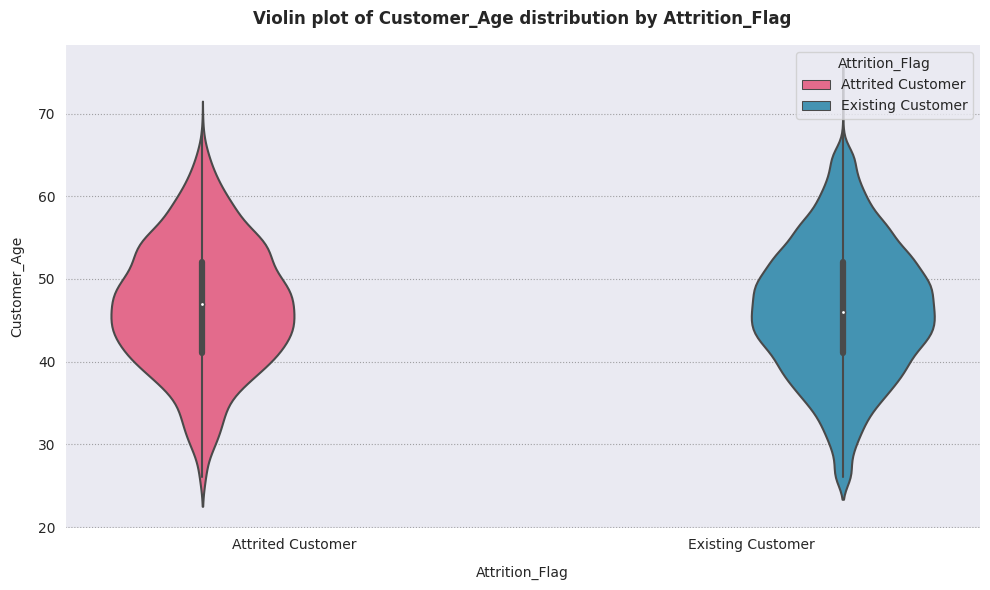

D’Agostino and Pearson Normality Test for '{num_feature}' across '{cat_feature}' groups

Group: Existing Customer (n = 8500)
Statistic:  2321.715
p-value:  0.00000
Interpretation: Data does not appear to follow a normal distribution.
Group: Attrited Customer (n = 1627)
Statistic:  521.992
p-value:  0.00000
Interpretation: Data does not appear to follow a normal distribution.
Mann–Whitney U Test for 'Credit_Limit' by 'Attrition_Flag'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 7468152.0
p-value     : 3.0078405911217964e-07

Result: Statistically significant difference between the two groups (Reject H₀).
 Interpretation: Group 'Existing Customer' has a higher median 'Credit_Limit' than Group 'Attrited Customer'.


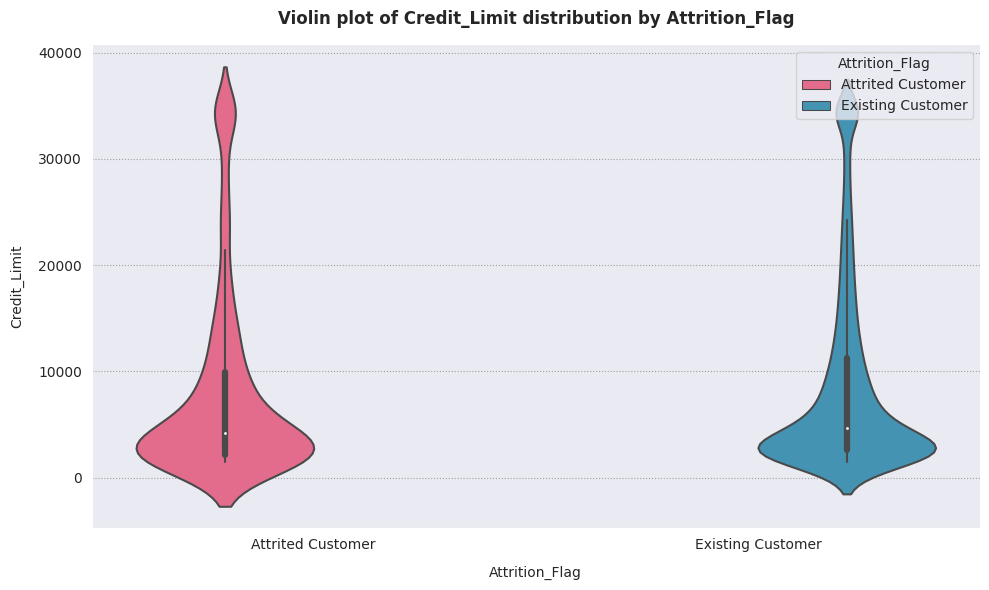

D’Agostino and Pearson Normality Test for '{num_feature}' across '{cat_feature}' groups

Group: Existing Customer (n = 8500)
Statistic:  2306.900
p-value:  0.00000
Interpretation: Data does not appear to follow a normal distribution.
Group: Attrited Customer (n = 1627)
Statistic:  519.997
p-value:  0.00000
Interpretation: Data does not appear to follow a normal distribution.
Mann–Whitney U Test for 'Avg_Open_To_Buy' by 'Attrition_Flag'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 6615783.0
p-value     : 0.005652366314054008

Result: Statistically significant difference between the two groups (Reject H₀).
 Interpretation: Group 'Attrited Customer' has a higher median 'Avg_Open_To_Buy' than Group 'Existing Customer'.


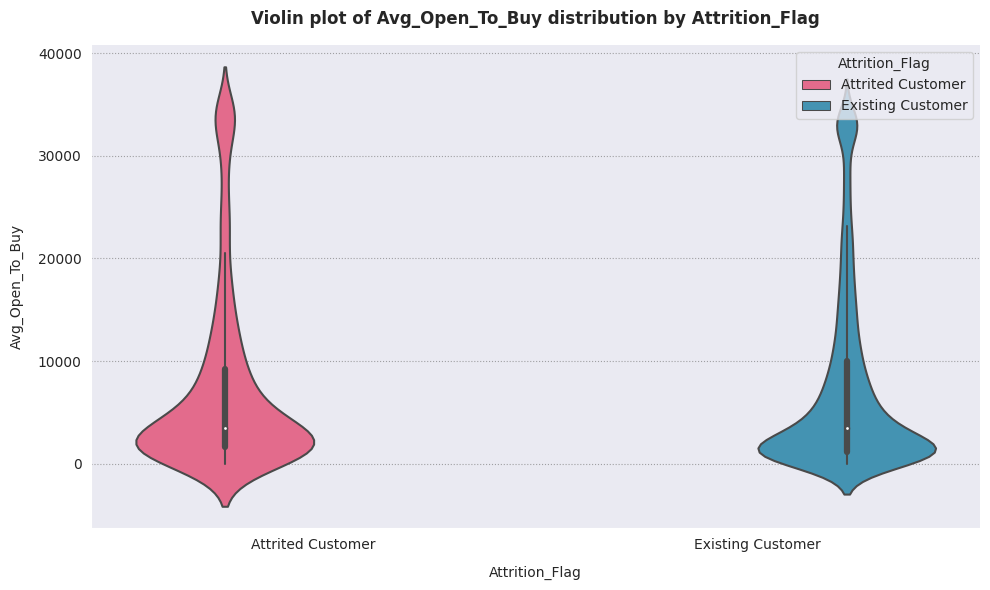

D’Agostino and Pearson Normality Test for '{num_feature}' across '{cat_feature}' groups

Group: Existing Customer (n = 8500)
Statistic:  3197.816
p-value:  0.00000
Interpretation: Data does not appear to follow a normal distribution.
Group: Attrited Customer (n = 1627)
Statistic:  459.748
p-value:  0.00000
Interpretation: Data does not appear to follow a normal distribution.
Mann–Whitney U Test for 'Total_Trans_Amt' by 'Attrition_Flag'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 9347620.0
p-value     : 2.719009390771486e-112

Result: Statistically significant difference between the two groups (Reject H₀).
 Interpretation: Group 'Existing Customer' has a higher median 'Total_Trans_Amt' than Group 'Attrited Customer'.


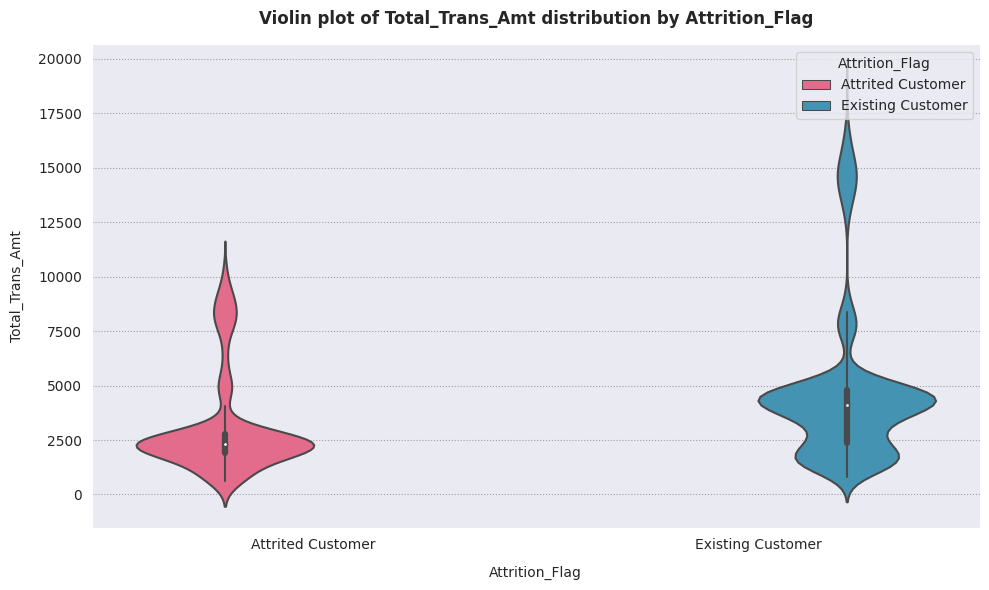

D’Agostino and Pearson Normality Test for '{num_feature}' across '{cat_feature}' groups

Group: Existing Customer (n = 8500)
Statistic:  53.873
p-value:  0.00000
Interpretation: Data does not appear to follow a normal distribution.
Group: Attrited Customer (n = 1627)
Statistic:  13.579
p-value:  0.00113
Interpretation: Data does not appear to follow a normal distribution.
Mann–Whitney U Test for 'Months_on_book' by 'Attrition_Flag'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 6749662.5
p-value     : 0.12366716741255608

Result: No statistically significant difference between the two groups (Fail to reject H₀).


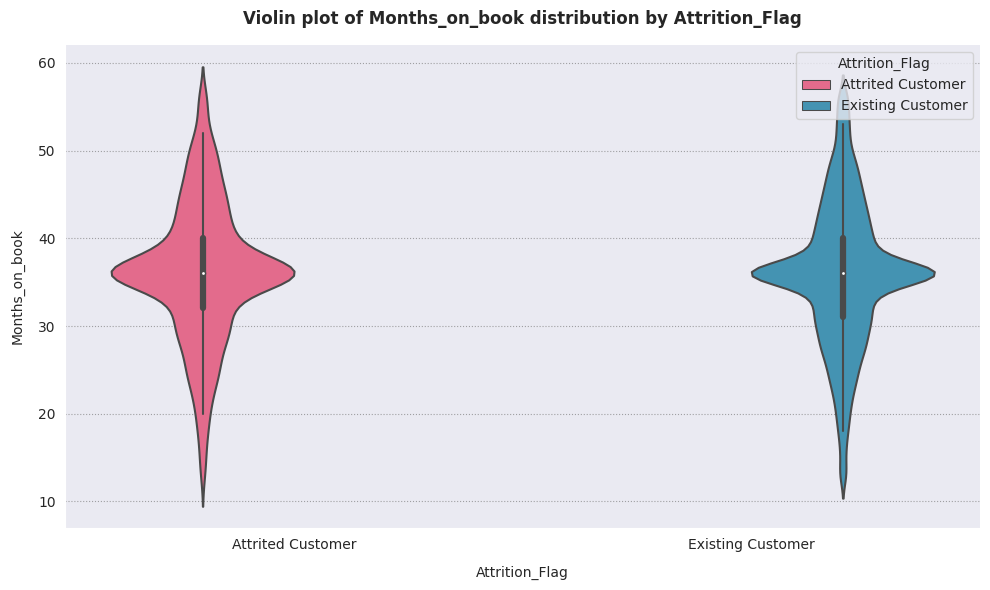

D’Agostino and Pearson Normality Test for '{num_feature}' across '{cat_feature}' groups

Group: Existing Customer (n = 8500)
Statistic:  17.716
p-value:  0.00014
Interpretation: Data does not appear to follow a normal distribution.
Group: Attrited Customer (n = 1627)
Statistic:  72.474
p-value:  0.00000
Interpretation: Data does not appear to follow a normal distribution.
Mann–Whitney U Test for 'Total_Trans_Ct' by 'Attrition_Flag'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 11003326.0
p-value     : 0.0

Result: Statistically significant difference between the two groups (Reject H₀).
 Interpretation: Group 'Existing Customer' has a higher median 'Total_Trans_Ct' than Group 'Attrited Customer'.


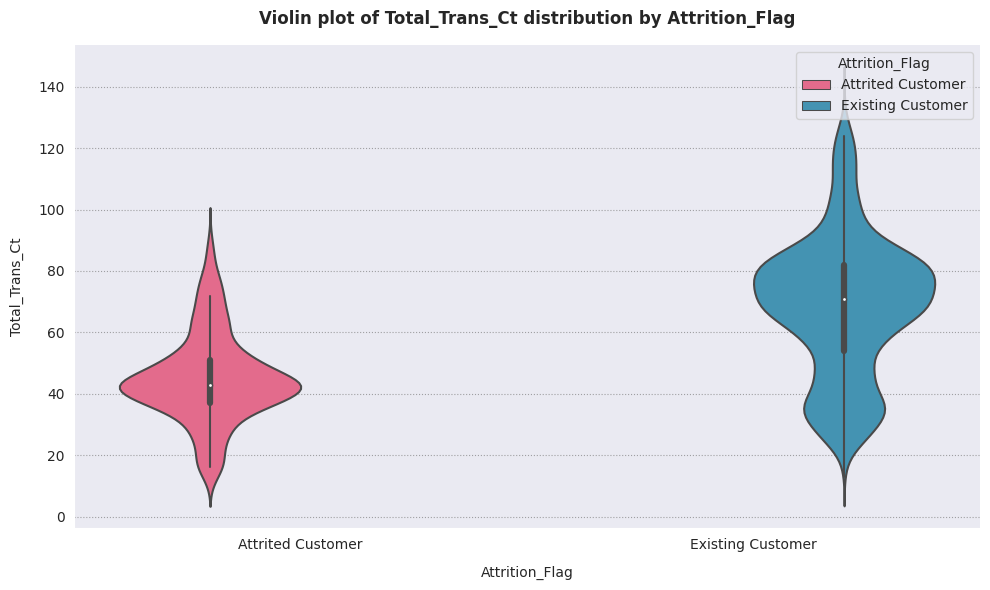

D’Agostino and Pearson Normality Test for '{num_feature}' across '{cat_feature}' groups

Group: Existing Customer (n = 8500)
Statistic:  5499.094
p-value:  0.00000
Interpretation: Data does not appear to follow a normal distribution.
Group: Attrited Customer (n = 1627)
Statistic:  403.553
p-value:  0.00000
Interpretation: Data does not appear to follow a normal distribution.
Mann–Whitney U Test for 'Total_Ct_Chng_Q4_Q1' by 'Attrition_Flag'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 10307283.0
p-value     : 1.908240659213709e-216

Result: Statistically significant difference between the two groups (Reject H₀).
 Interpretation: Group 'Existing Customer' has a higher median 'Total_Ct_Chng_Q4_Q1' than Group 'Attrited Customer'.


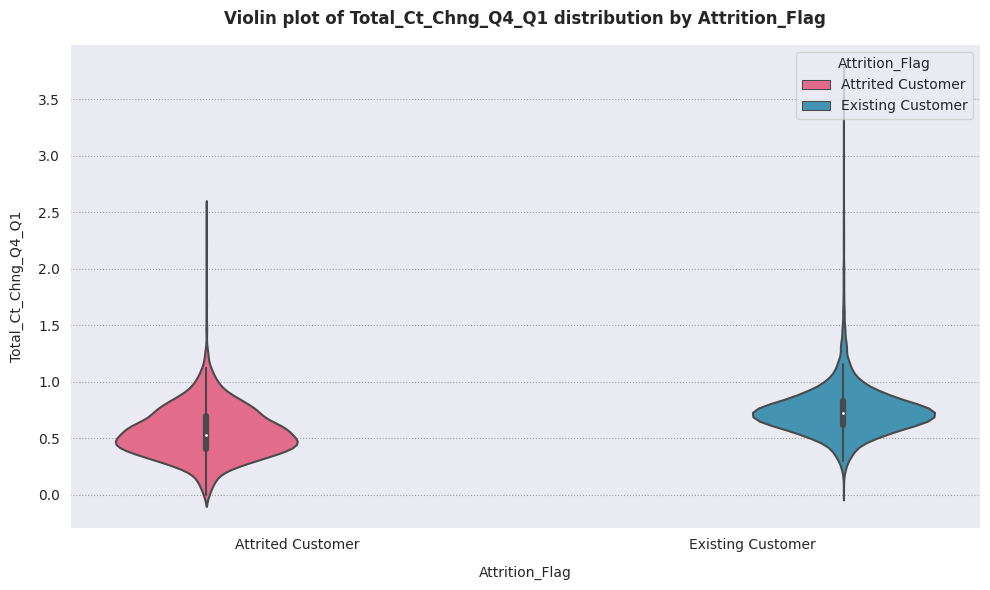

D’Agostino and Pearson Normality Test for '{num_feature}' across '{cat_feature}' groups

Group: Existing Customer (n = 8500)
Statistic:  4334.111
p-value:  0.00000
Interpretation: Data does not appear to follow a normal distribution.
Group: Attrited Customer (n = 1627)
Statistic:  12.923
p-value:  0.00156
Interpretation: Data does not appear to follow a normal distribution.
Mann–Whitney U Test for 'Total_Amt_Chng_Q4_Q1' by 'Attrition_Flag'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 8023238.5
p-value     : 1.0644743098554122e-24

Result: Statistically significant difference between the two groups (Reject H₀).
 Interpretation: Group 'Existing Customer' has a higher median 'Total_Amt_Chng_Q4_Q1' than Group 'Attrited Customer'.


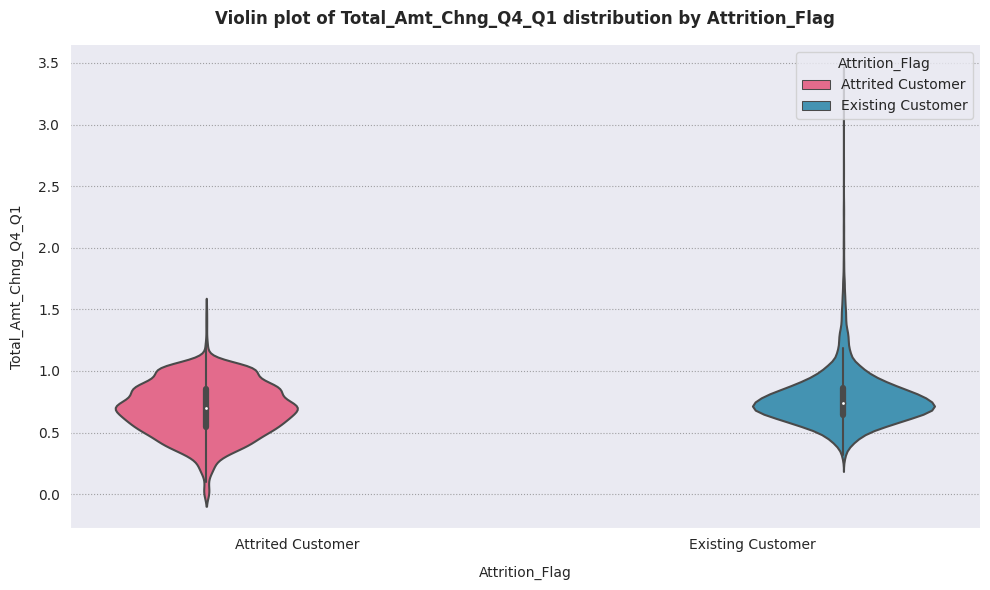

D’Agostino and Pearson Normality Test for '{num_feature}' across '{cat_feature}' groups

Group: Existing Customer (n = 8500)
Statistic:  1895.918
p-value:  0.00000
Interpretation: Data does not appear to follow a normal distribution.
Group: Attrited Customer (n = 1627)
Statistic:  433.202
p-value:  0.00000
Interpretation: Data does not appear to follow a normal distribution.
Mann–Whitney U Test for 'Avg_Utilization_Ratio' by 'Attrition_Flag'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 9509093.5
p-value     : 2.869097017266704e-129

Result: Statistically significant difference between the two groups (Reject H₀).
 Interpretation: Group 'Existing Customer' has a higher median 'Avg_Utilization_Ratio' than Group 'Attrited Customer'.


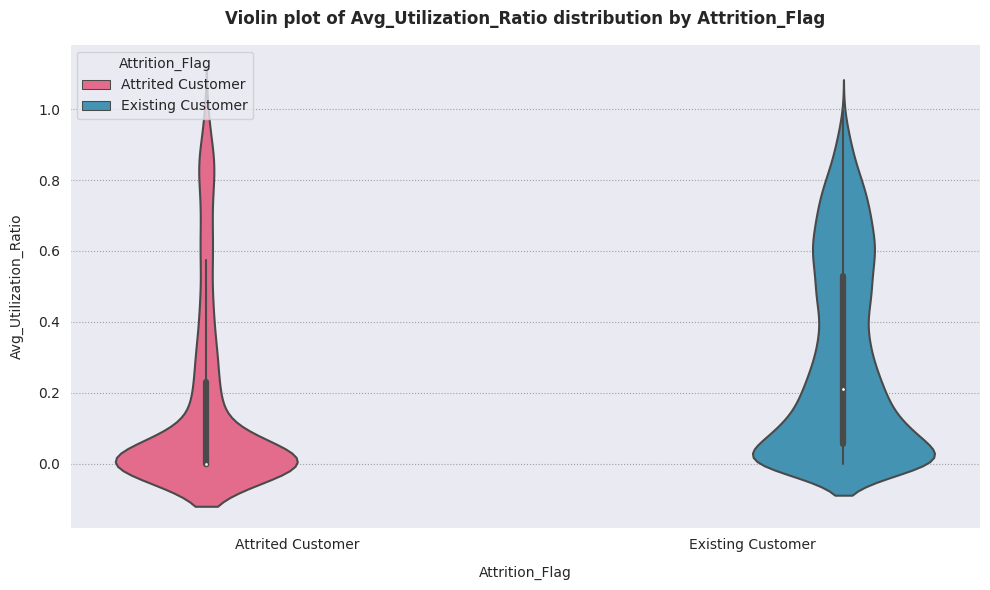

D’Agostino and Pearson Normality Test for '{num_feature}' across '{cat_feature}' groups

Group: Existing Customer (n = 8500)
Statistic:  982.460
p-value:  0.00000
Interpretation: Data does not appear to follow a normal distribution.
Group: Attrited Customer (n = 1627)
Statistic:  238.552
p-value:  0.00000
Interpretation: Data does not appear to follow a normal distribution.
Mann–Whitney U Test for 'Total_Revolving_Bal' by 'Attrition_Flag'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 9510716.0
p-value     : 1.9156786730316762e-129

Result: Statistically significant difference between the two groups (Reject H₀).
 Interpretation: Group 'Existing Customer' has a higher median 'Total_Revolving_Bal' than Group 'Attrited Customer'.


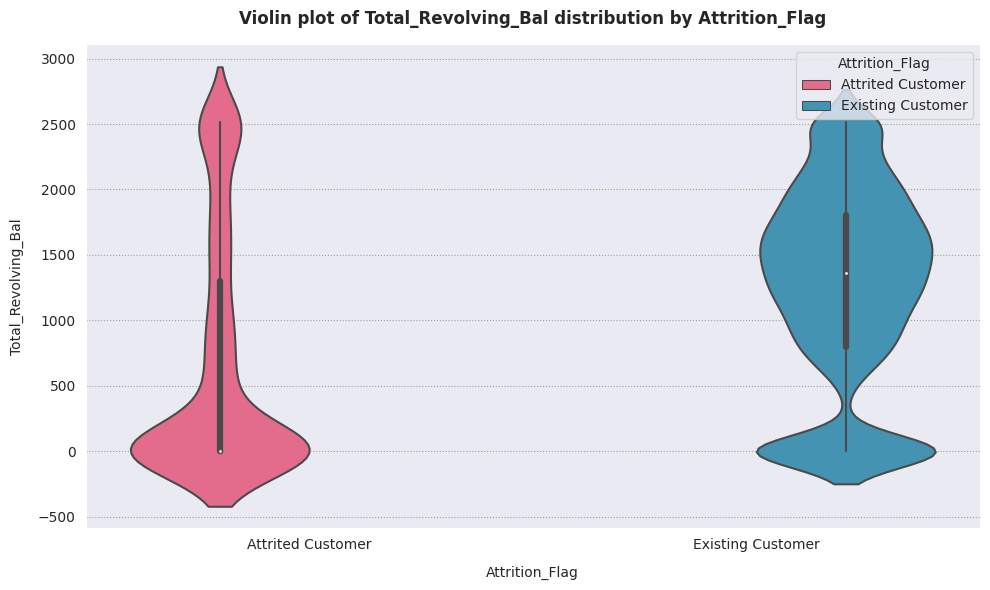

In [41]:
for feature in num_features:
    plot_numerical_distribution_by_attrition(feature = feature)

### Insight Numerical Features by Attrition

1. **Customer_Age, Months_on_book:**

> **Customer\_Age, Months\_on\_book are not a statistically significant factor** <br>
> → Age, Months_on_book do **not meaningfully differentiate churn behavior**

2. **Credit_Limit:**

> **Credit\_Limit is statistically and visually associated with churn** <br>
> → Attrited customers generally hold **lower credit lines**

3. **Avg_Open_To_Buy:**

> **Avg\_Open\_To\_Buy is statistically and visually associated with churn** <br>
> → Attrited customers tend to have a lower available credit balance.

4. **Total_Trans_Amt:**

> **Total_Trans_Amt is statistically and visually associated with churn** <br>
> → Attrited customers tend to have a lower total transicion amount.

5. **Total_Trans_Ct:** 

> **Total_Trans_Ct is statistically and visually associated with churn** <br>
> → Attrited customers tend to have a lower total transicion.

6. **Total_Ct_Chng_Q4_Q1:**

> **Total_Ct_Chng_Q4_Q1 is statistically and visually associated with churn** <br>
> → Attrited customers tend to have a lower Percentage change in total transaction amount from Q1 to Q4.

7. **Total_Amt_Chng_Q4_Q1:** 

> **Total_Amt_Chng_Q4_Q1 is statistically and visually associated with churn** <br>
> → Attrited customers tend to have a lower rate of change in transaction volume from Q1 to Q4.

8. **Avg_Utilization_Ratio:**

> **Avg_Utilization_Ratio is statistically and visually associated with churn** <br>
> → Attrited customers tend to have a lower average utilization rate of credit limit.

9. **Total_Revolving_Bal:**

> **Total_Revolving_Bal is statistically and visually associated with churn** <br>
> → Attrited customers tend to have a lower revolving credit balance (interest payable).

### **Summary of Feature Relationships with Churn**

| Feature                  | Type        | Statistical Test Used | Relationship with Attrition | Summary                                                                 |
|--------------------------|-------------|------------------------|------------------------------|-------------------------------------------------------------------------|
| **Gender**               | Categorical | Chi-Square Test        | ✅ Significant               | Female customers are slightly more likely to churn                     |
| **Education_Level**      | Categorical | Chi-Square Test        | ❌ Not Significant           | Doctorate holders show higher churn, but overall pattern is weak       |
| **Marital_Status**       | Categorical | Chi-Square Test        | ❌ Not Significant           | No strong difference between marital groups                            |
| **Income_Category**      | Categorical | Chi-Square Test        | ✅ Significant               | $60K–$80K segment has lowest churn rate                                |
| **Card_Category**        | Categorical | Chi-Square Test        | ❌ Not Significant           | Card type does not impact churn significantly                          |
| **Dependent_count**      | Categorical | Chi-Square Test        | ❌ Not Significant           | Weak signal; 3 dependents slightly overrepresented among churners      |
| **Months_Inactive_12_mon** | Categorical | Chi-Square Test        | ✅ Significant               | 3–4 months inactivity strongly linked with higher churn                |
| **Contacts_Count_12_mon** | Categorical | Chi-Square Test        | ✅ Significant               | Frequent contact (especially 6/year) associated with high churn        |
| **Total_Relationship_Count** | Categorical | Chi-Square Test      | ✅ Significant               | Fewer products (1–2) linked with higher churn                          |
| **Customer_Age**         | Numerical   | Mann–Whitney U Test    | ❌ Not Significant           | Age does not differ significantly between churned and retained         |
| **Months_on_book**       | Numerical   | Mann–Whitney U Test    | ❌ Not Significant           | Tenure shows no significant churn pattern                              |
| **Credit_Limit**         | Numerical   | Mann–Whitney U Test    | ✅ Significant               | Churned customers tend to have lower credit limits                     |
| **Avg_Open_To_Buy**      | Numerical   | Mann–Whitney U Test    | ✅ Significant               | Churned customers have less available credit                           |
| **Total_Trans_Amt**      | Numerical   | Mann–Whitney U Test    | ✅ Significant               | Churned customers spend less overall                                   |
| **Total_Trans_Ct**       | Numerical   | Mann–Whitney U Test    | ✅ Significant               | Churned customers have fewer transactions                              |
| **Total_Ct_Chng_Q4_Q1**  | Numerical   | Mann–Whitney U Test    | ✅ Significant               | Churned customers show smaller increase in transaction count           |
| **Total_Amt_Chng_Q4_Q1** | Numerical   | Mann–Whitney U Test    | ✅ Significant               | Churned customers show lower growth in transaction volume              |
| **Avg_Utilization_Ratio**| Numerical   | Mann–Whitney U Test    | ✅ Significant               | Churned customers have lower utilization rates                         |
| **Total_Revolving_Bal**  | Numerical   | Mann–Whitney U Test    | ✅ Significant               | Churned customers have lower revolving balances                        |
